In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
from astropy.io import fits
%matplotlib inline

In [2]:
agemodel = ppy.sfhmodels.NonParam()

tau_model = ppy.sfhmodels.TauModel(iso_step=-1)
tau_model.set_params(np.array([2.258, 2.8205]))

tau_SFH = list(np.log10(tau_model.SFH))

gal_np = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2),
    ppy.dustmodels.SingleDust(),
    agemodel,
    ppy.distancemodels.VariableDistance()
)
gal_np.set_params(np.array([0.1676, -1.8033] + tau_SFH + [24.42]))

gal_nomu = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2),
    ppy.dustmodels.SingleDust(),
    agemodel,
    ppy.distancemodels.FixedDistance(24.42)
)
gal_nomu.set_params(np.array([0.1676, -1.8033] + tau_SFH))

In [3]:
res = {}
m31_regions = [1, 2]
m31_names = {1: 'Bulge', 2: 'Disk'}
for r in [1, 2]:
    res['m{:d}'.format(r)] = ppy.results.ResultsPlotter('results/m31_tau_r{:d}.csv'.format(r),
                                                        run_name='M31 {:s} (Wide Prior)'.format(m31_names[r]))
    res['m{:d}_nm'.format(r)] = ppy.results.ResultsPlotter('results/m31_taunomu_r{:d}.csv'.format(r),
                                                        run_name='M31 {:s} (Wide Prior, Distance Fixed)'.format(m31_names[r]))
    res['n{:d}'.format(r)] = ppy.results.ResultsPlotter('results/m31_tau_narrow_r{:d}.csv'.format(r),
                                                        run_name='M31 {:s}'.format(m31_names[r]))
    res['n{:d}_nm'.format(r)] = ppy.results.ResultsPlotter('results/m31_taunomu_narrow_r{:d}.csv'.format(r),
                                                        run_name='M31 {:s} (Distance Fixed)'.format(m31_names[r]))
    res['1024_{:d}'.format(r)] = ppy.results.ResultsPlotter('results/m31_tau_narrow_1024_r{:d}.csv'.format(r),
                                                        run_name='M31 {:s} (Nim = 1024)'.format(m31_names[r]))
    res['sf_{:d}'.format(r)] = ppy.results.ResultsPlotter('results/m31_tau_onefilt_r{:d}.csv'.format(r),
                                                        run_name='M31 {:s} (One Filter)'.format(m31_names[r]))
    res['narr_{:d}'.format(r)] = ppy.results.ResultsPlotter('results/m31_tau_narrowF814W_r{:d}.csv'.format(r),
                                                        run_name='M31 {:s} (Narrow F814W)'.format(m31_names[r]))
    res['lm3_{:d}'.format(r)] = ppy.results.ResultsPlotter('results/m31_taulm3_r{:d}.csv'.format(r),
                                                        run_name='M31 {:s} (LikeMode 3)'.format(m31_names[r]))
    res['narr_lm3_{:d}'.format(r)] = ppy.results.ResultsPlotter('results/m31_taulm3_narrowF814W_r{:d}.csv'.format(r),
                                                        run_name='M31 {:s} (LikeMode 3, Narrow F814W)'.format(m31_names[r]))
    res['psf_lm3_{:d}'.format(r)] = ppy.results.ResultsPlotter('results/m31_taulm3_psf_r{:d}.csv'.format(r),
                                                        run_name='M31 {:s} (LikeMode 3, Updated PSFs)'.format(m31_names[r]))
    res['psf_{:d}'.format(r)] = ppy.results.ResultsPlotter('results/m31_tau_psf_r{:d}.csv'.format(r),
                                                        run_name='M31 {:s} (Updated PSFs)'.format(m31_names[r]))
    res['exp_{:d}'.format(r)] = ppy.results.ResultsPlotter('results/m31_tau_exp_r{:d}.csv'.format(r),
                                                        run_name='M31 {:s} (Long Exposure)'.format(m31_names[r]))
    res['exp_lm3_{:d}'.format(r)] = ppy.results.ResultsPlotter('results/m31_taulm3_exp_r{:d}.csv'.format(r),
                                                        run_name='M31 {:s} (LikeMode 3, Long Exposure)'.format(m31_names[r]))
for r in [1]:
    res['np{:d}'.format(r)] = ppy.results.ResultsPlotter('results/m31_nonparam_r{:d}.csv'.format(r), true_model=gal_np, 
                                                        run_name='M31 {:s} Nonparam'.format(m31_names[r]))
    res['np{:d}_nm'.format(r)] = ppy.results.ResultsPlotter('results/m31_nonparam_nomu_r{:d}.csv'.format(r), true_model=gal_nomu,
                                                        run_name='M31 {:s} Nonparam (Distance Fixed)'.format(m31_names[r]))

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
dmod_m31 = 24.42
xmax = np.max([len(r.df) for r in res.values()])
print(xmax)


11769


In [5]:
for k, v in res.items():
    if '_nm' in k:
        v.df['dmod'] = dmod_m31

In [6]:
def plot_sets(run_names, regions=[1,2], chains_only=False, dmod_true=24.42, nonparam=False):
    if chains_only:
        nr = 5
    else:
        nr = 8
    if nonparam:
        nr += 4
    nx = len(run_names)
    fs = (10+5*nx, 3*nr)
    fig, axes = plt.subplots(ncols=len(run_names)*len(regions), nrows=nr, figsize=fs, sharex=True, sharey='row')
    for i, r in enumerate(regions):
        for j, n in enumerate(run_names):
            results = res[n.format(r)]
            plot_axes = axes[:, nx*i + j]
            if '_nm' in n:
                if nonparam:
                    plot_axes = list(plot_axes[:7])+list(plot_axes[8:])
                else:
                    plot_axes = list(plot_axes[:4])
            results.plot_chains(axes=plot_axes, chains_only=chains_only)
    if not nonparam:
        for ax in axes[4]:
            ax.axhline(y=dmod_true, ls='--', color='r')
    plt.tight_layout()
    return fig, axes

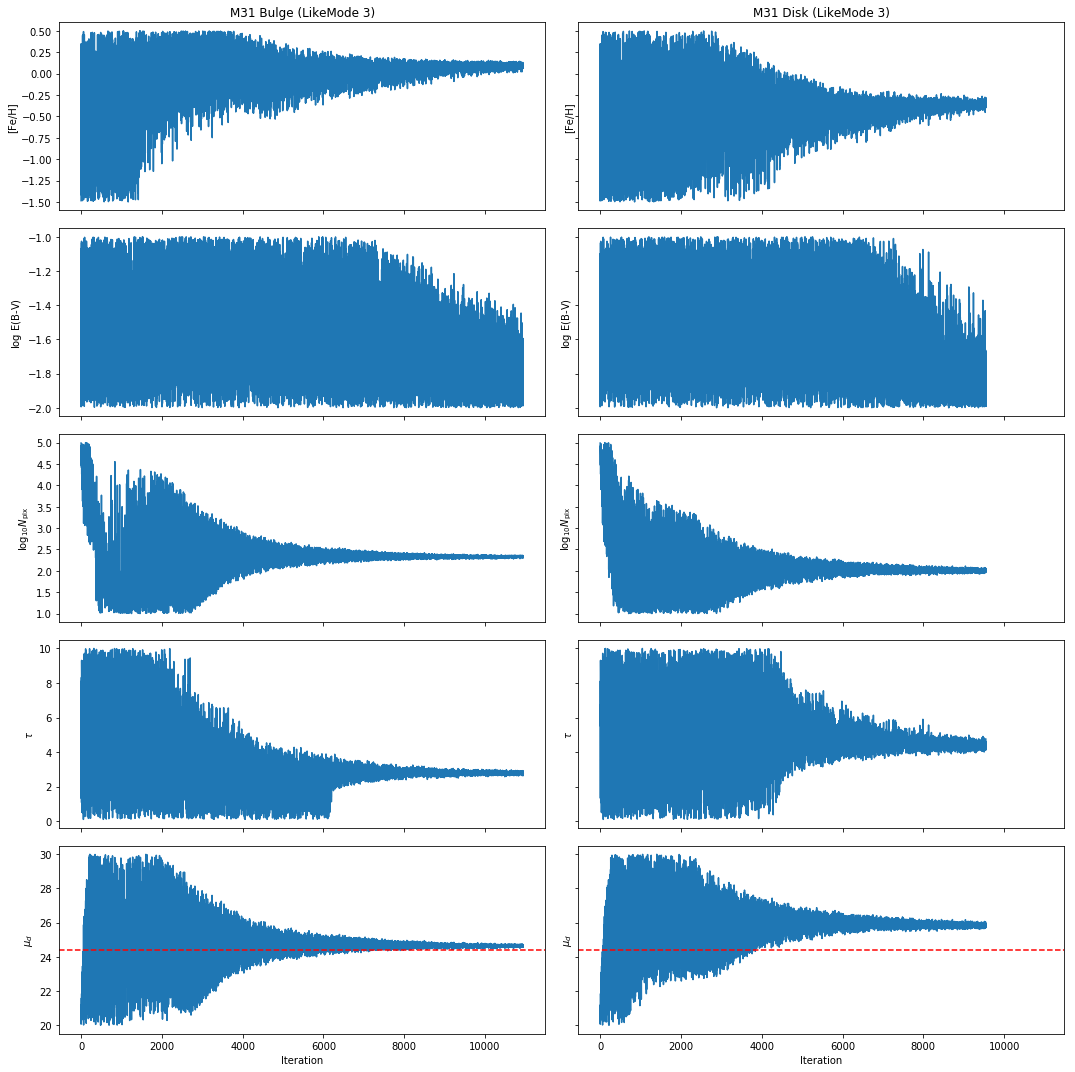

In [7]:
fig, axes = plot_sets(['lm3_{:d}'], chains_only=True)
# plt.savefig('figures/m31_chains_narrowF814W.jpg')

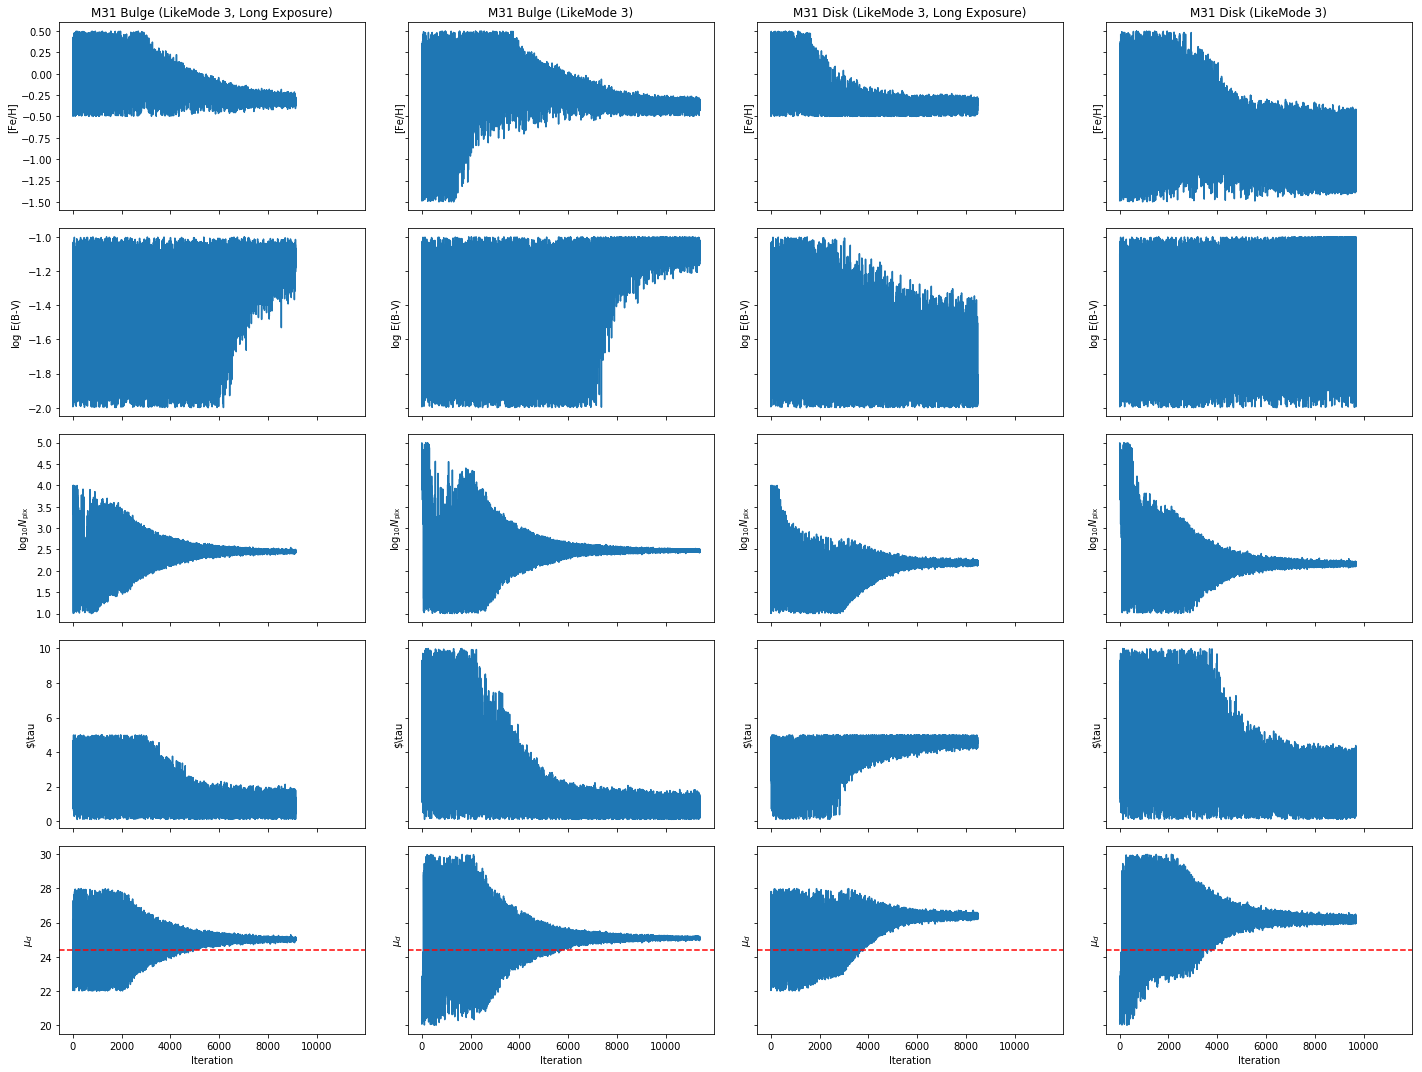

In [8]:
fig, axes = plot_sets(['exp_lm3_{:d}', 'lm3_{:d}'], chains_only=True)
# plt.savefig('figures/m31_chains_narrowF814W.jpg')

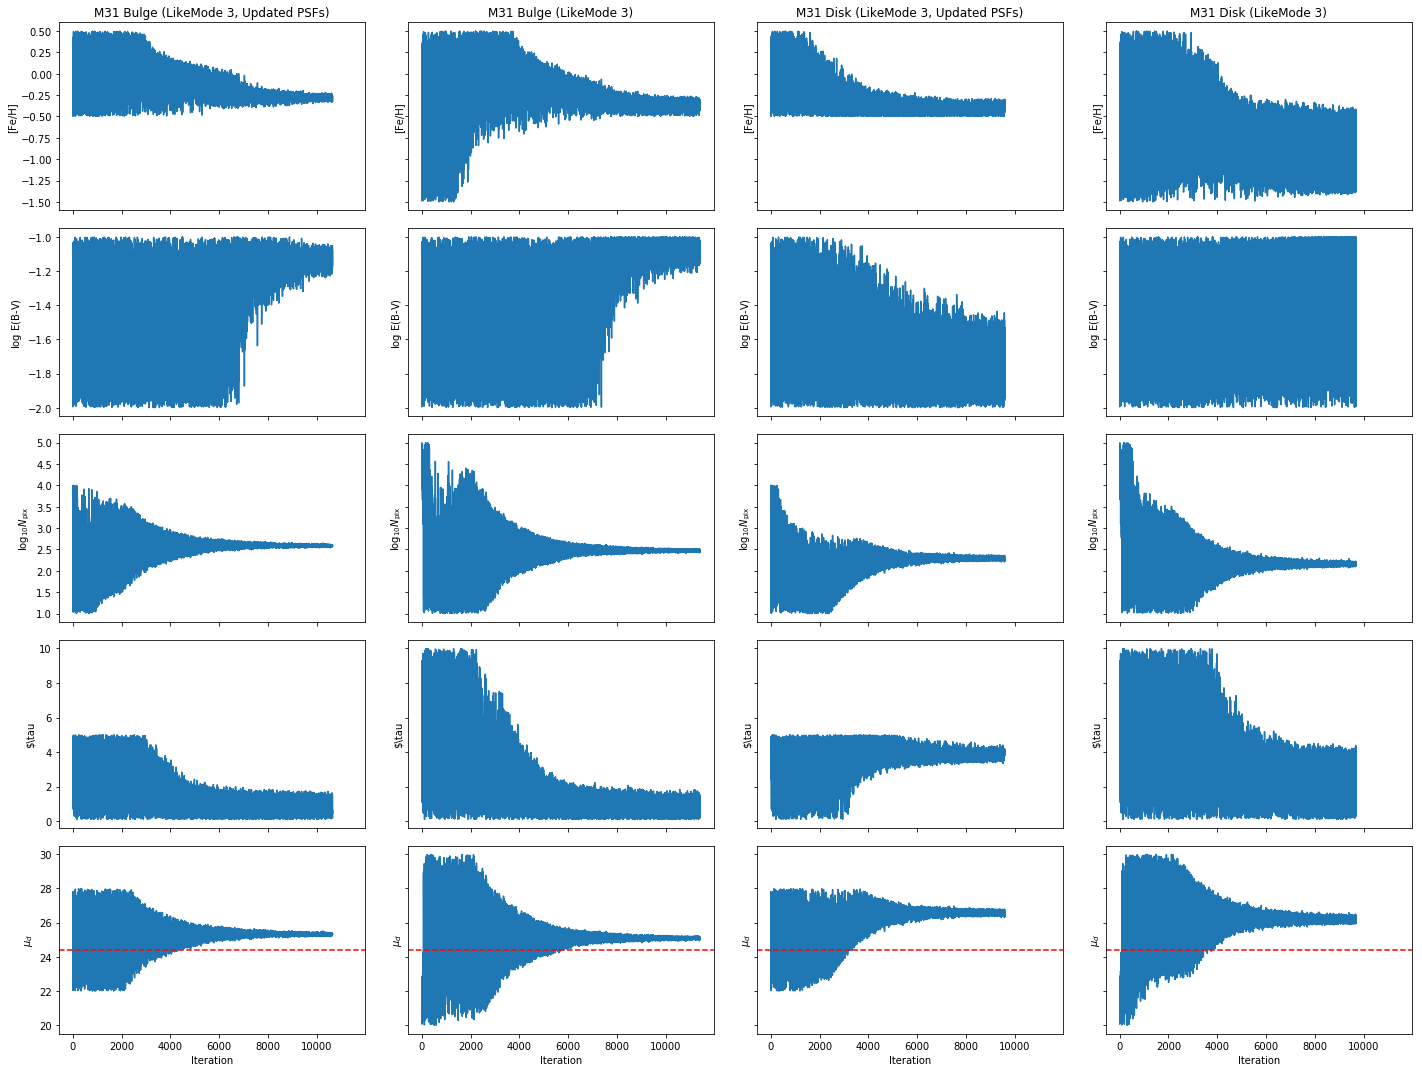

In [12]:
fig, axes = plot_sets(['psf_lm3_{:d}', 'lm3_{:d}'], chains_only=True)
# plt.savefig('figures/m31_chains_narrowF814W.jpg')

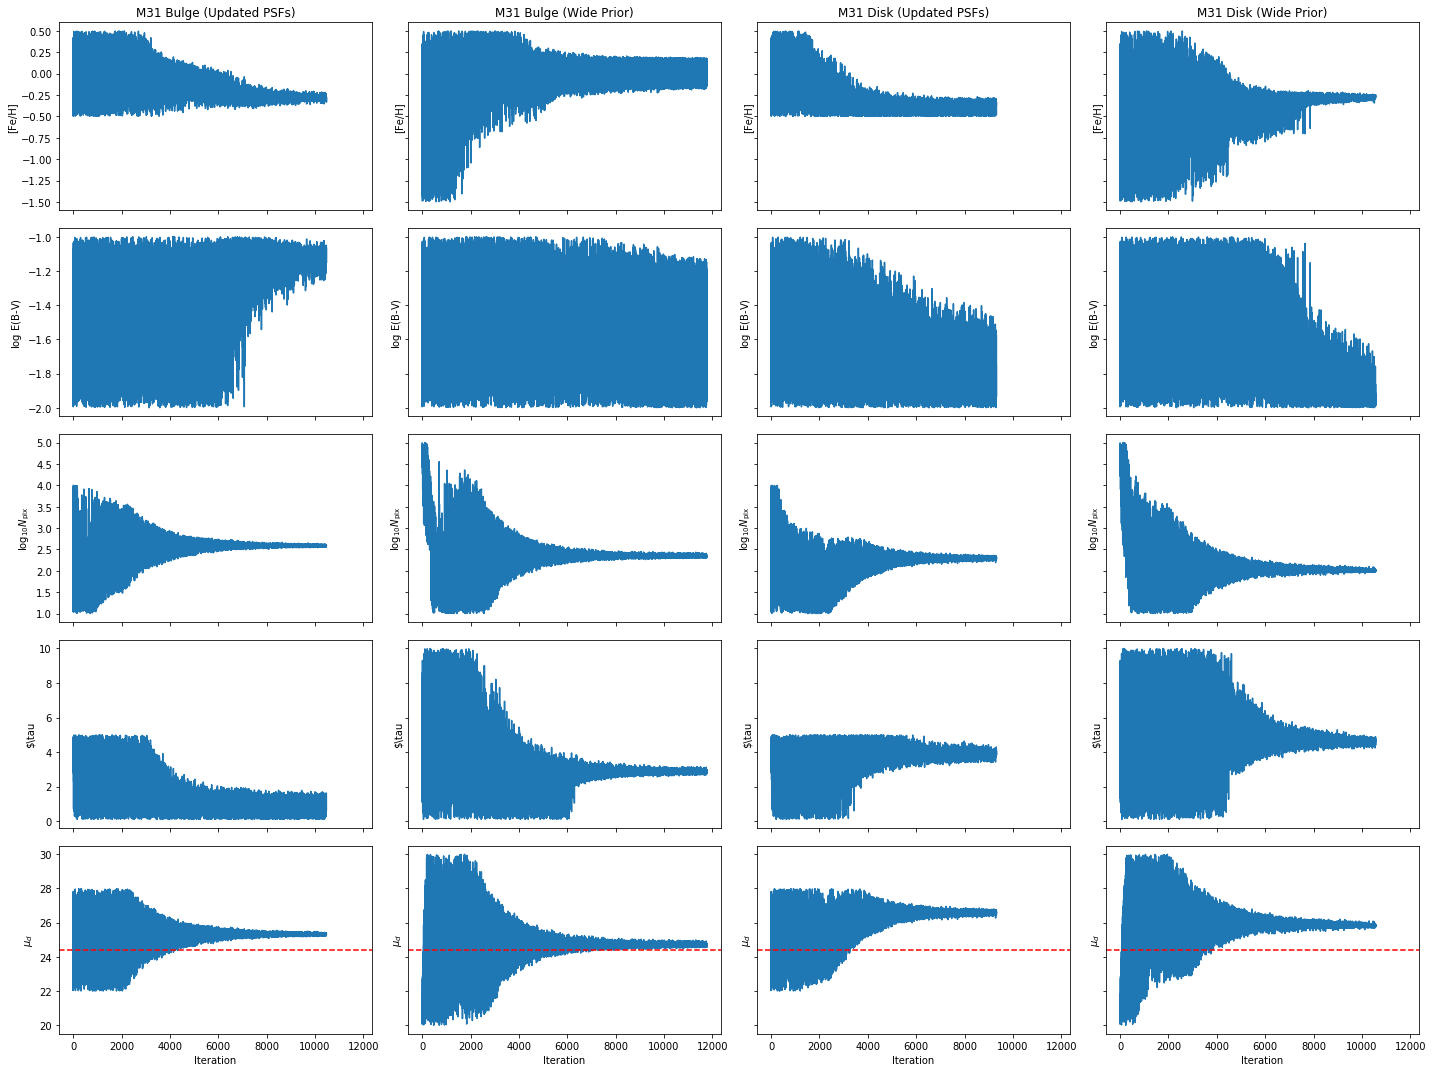

In [13]:
fig, axes = plot_sets(['psf_{:d}', 'm{:d}'], chains_only=True)
# plt.savefig('figures/m31_chains_narrowF814W.jpg')

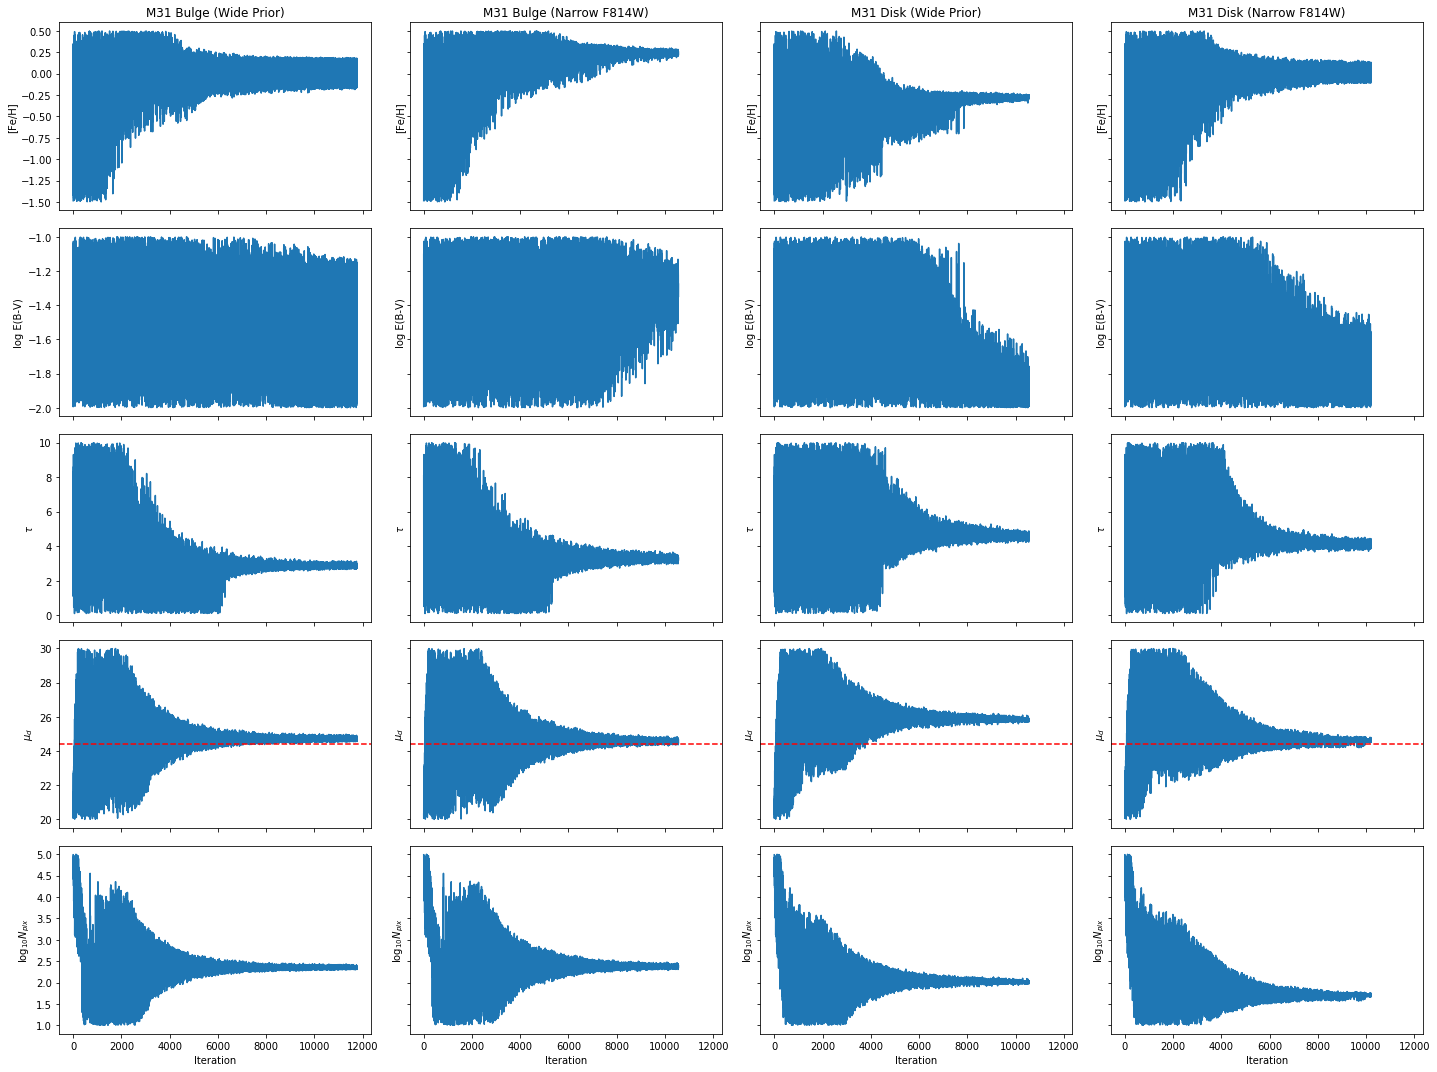

In [9]:
fig, axes = plot_sets(['m{:d}', 'psf_{:d}'], chains_only=True)
plt.savefig('figures/m31_chains_narrowF814W.jpg')

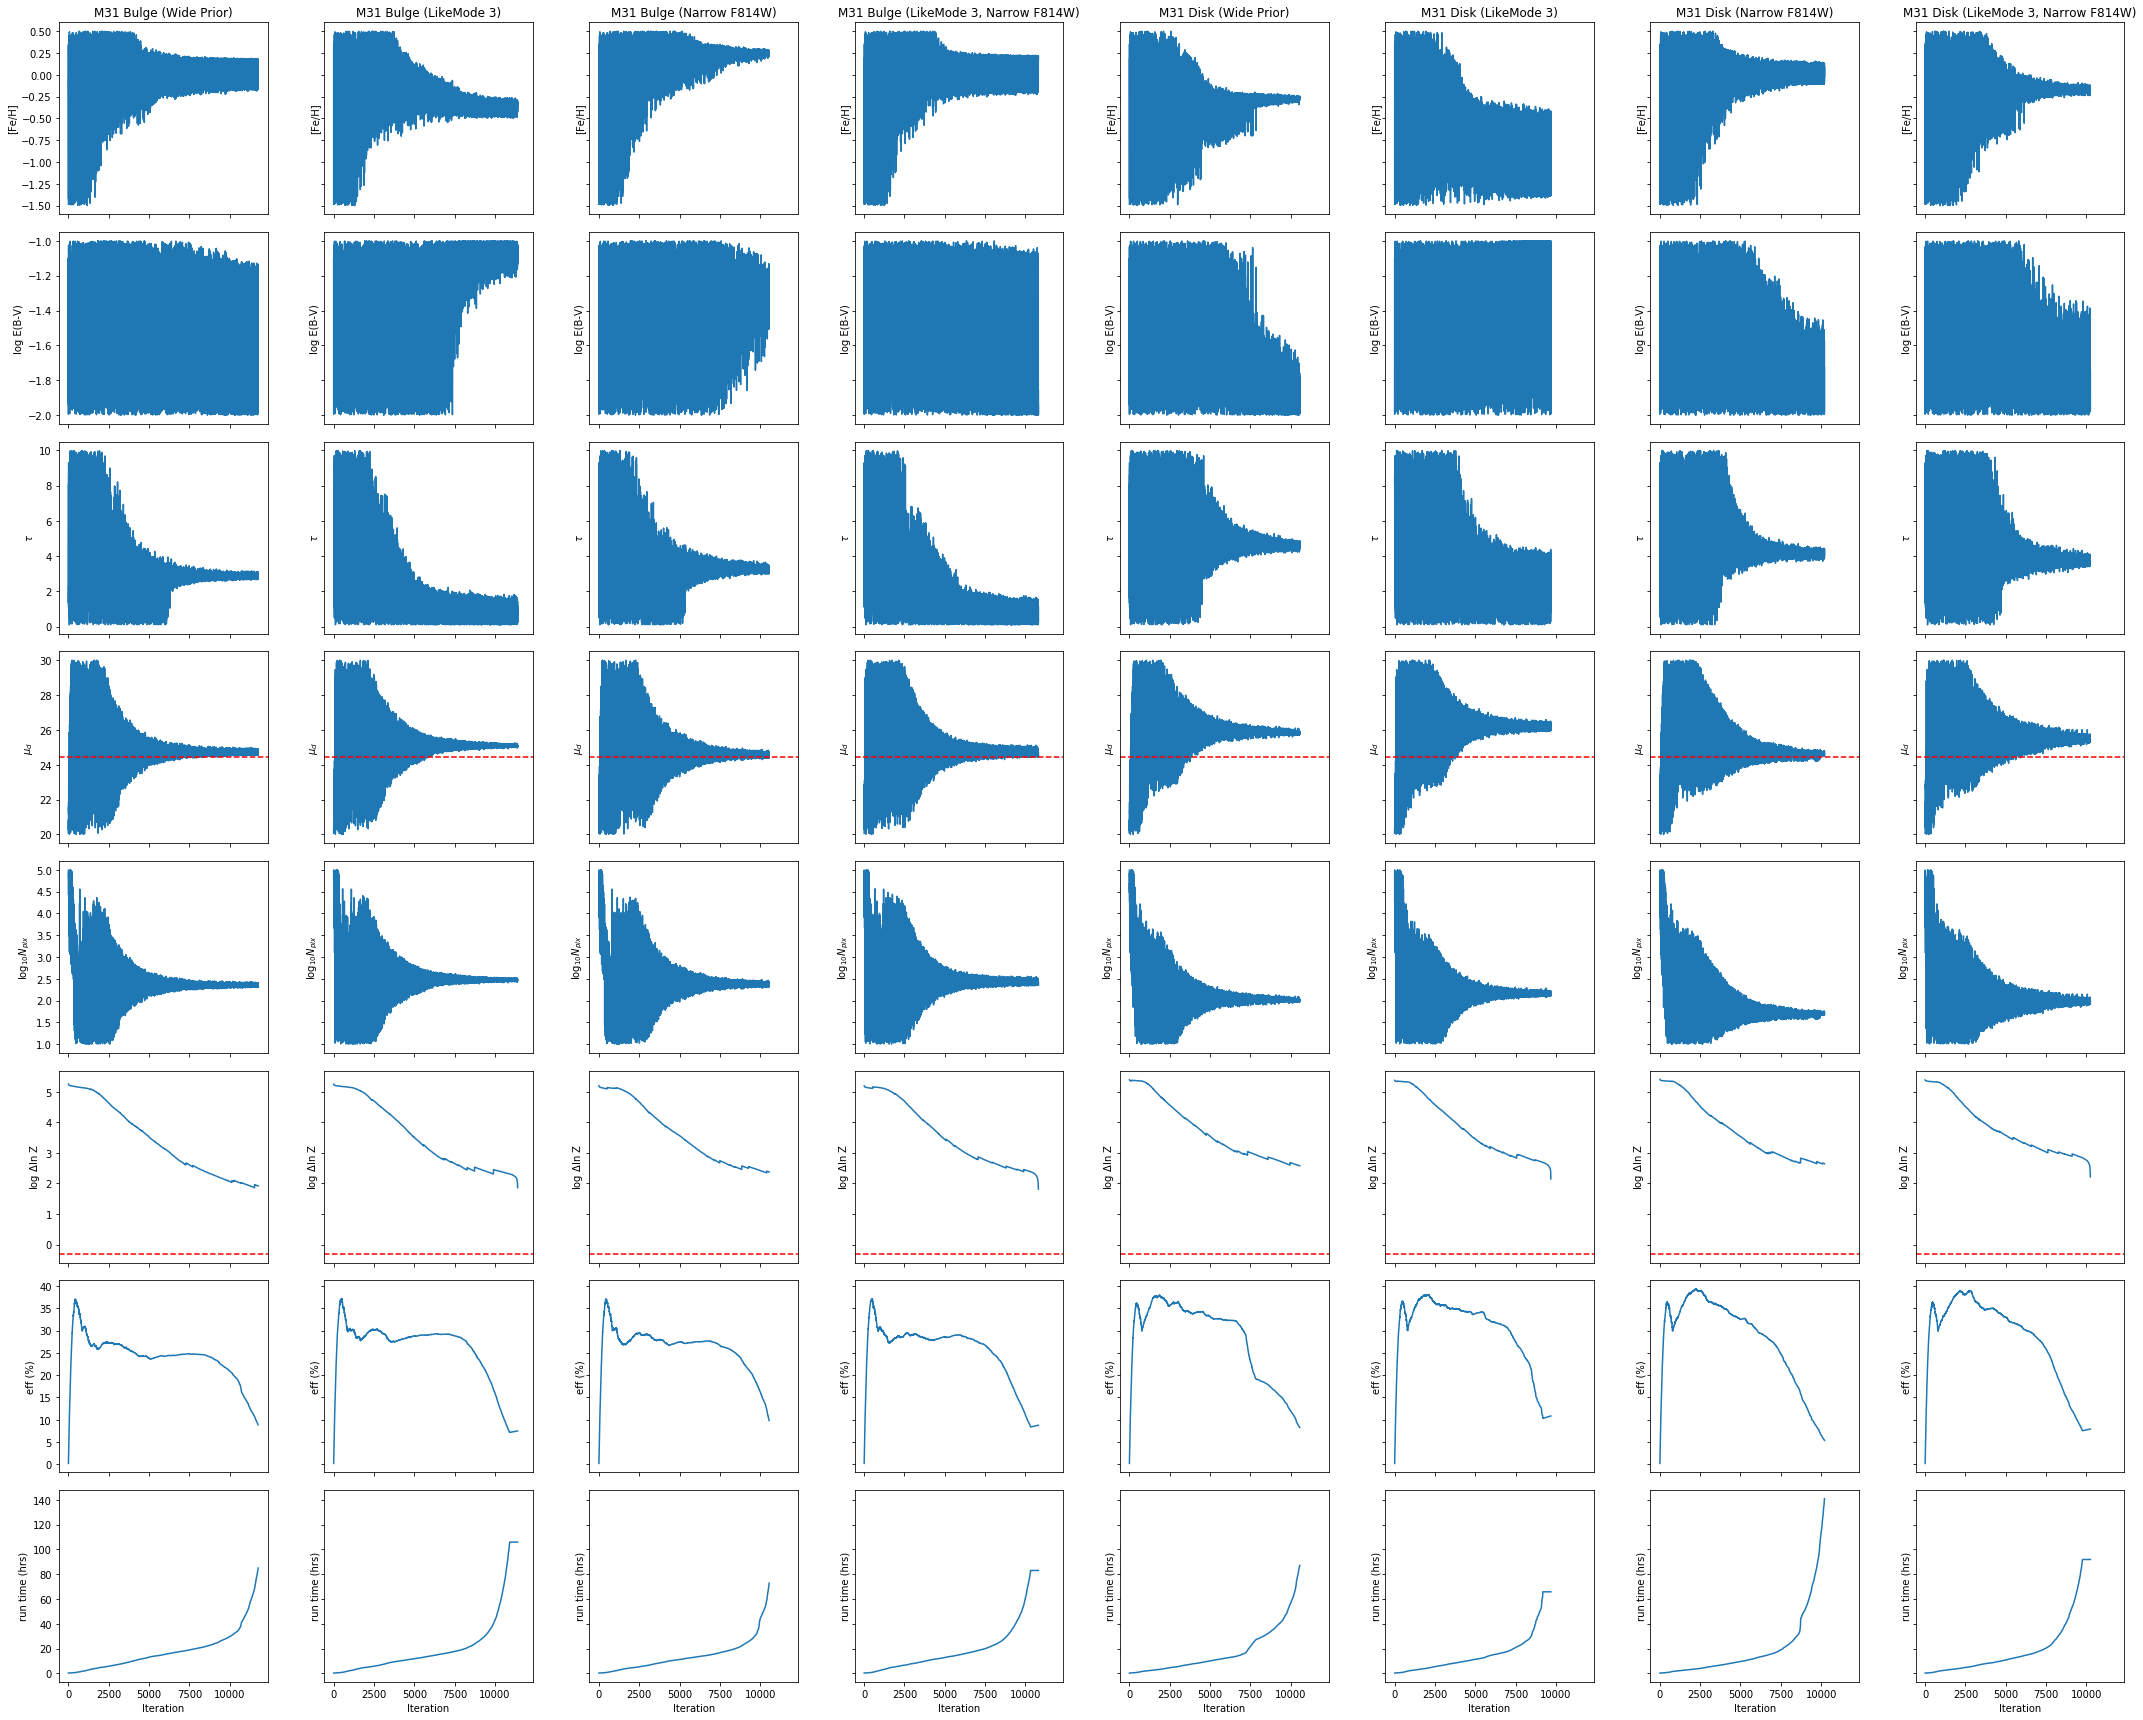

In [7]:
fig, axes = plot_sets(['m{:d}', 'lm3_{:d}', 'psf_{:d}', 'lm3_psf_{:d}'], chains_only=False)
# plt.savefig('figures/m31_chains_lm3.jpg')

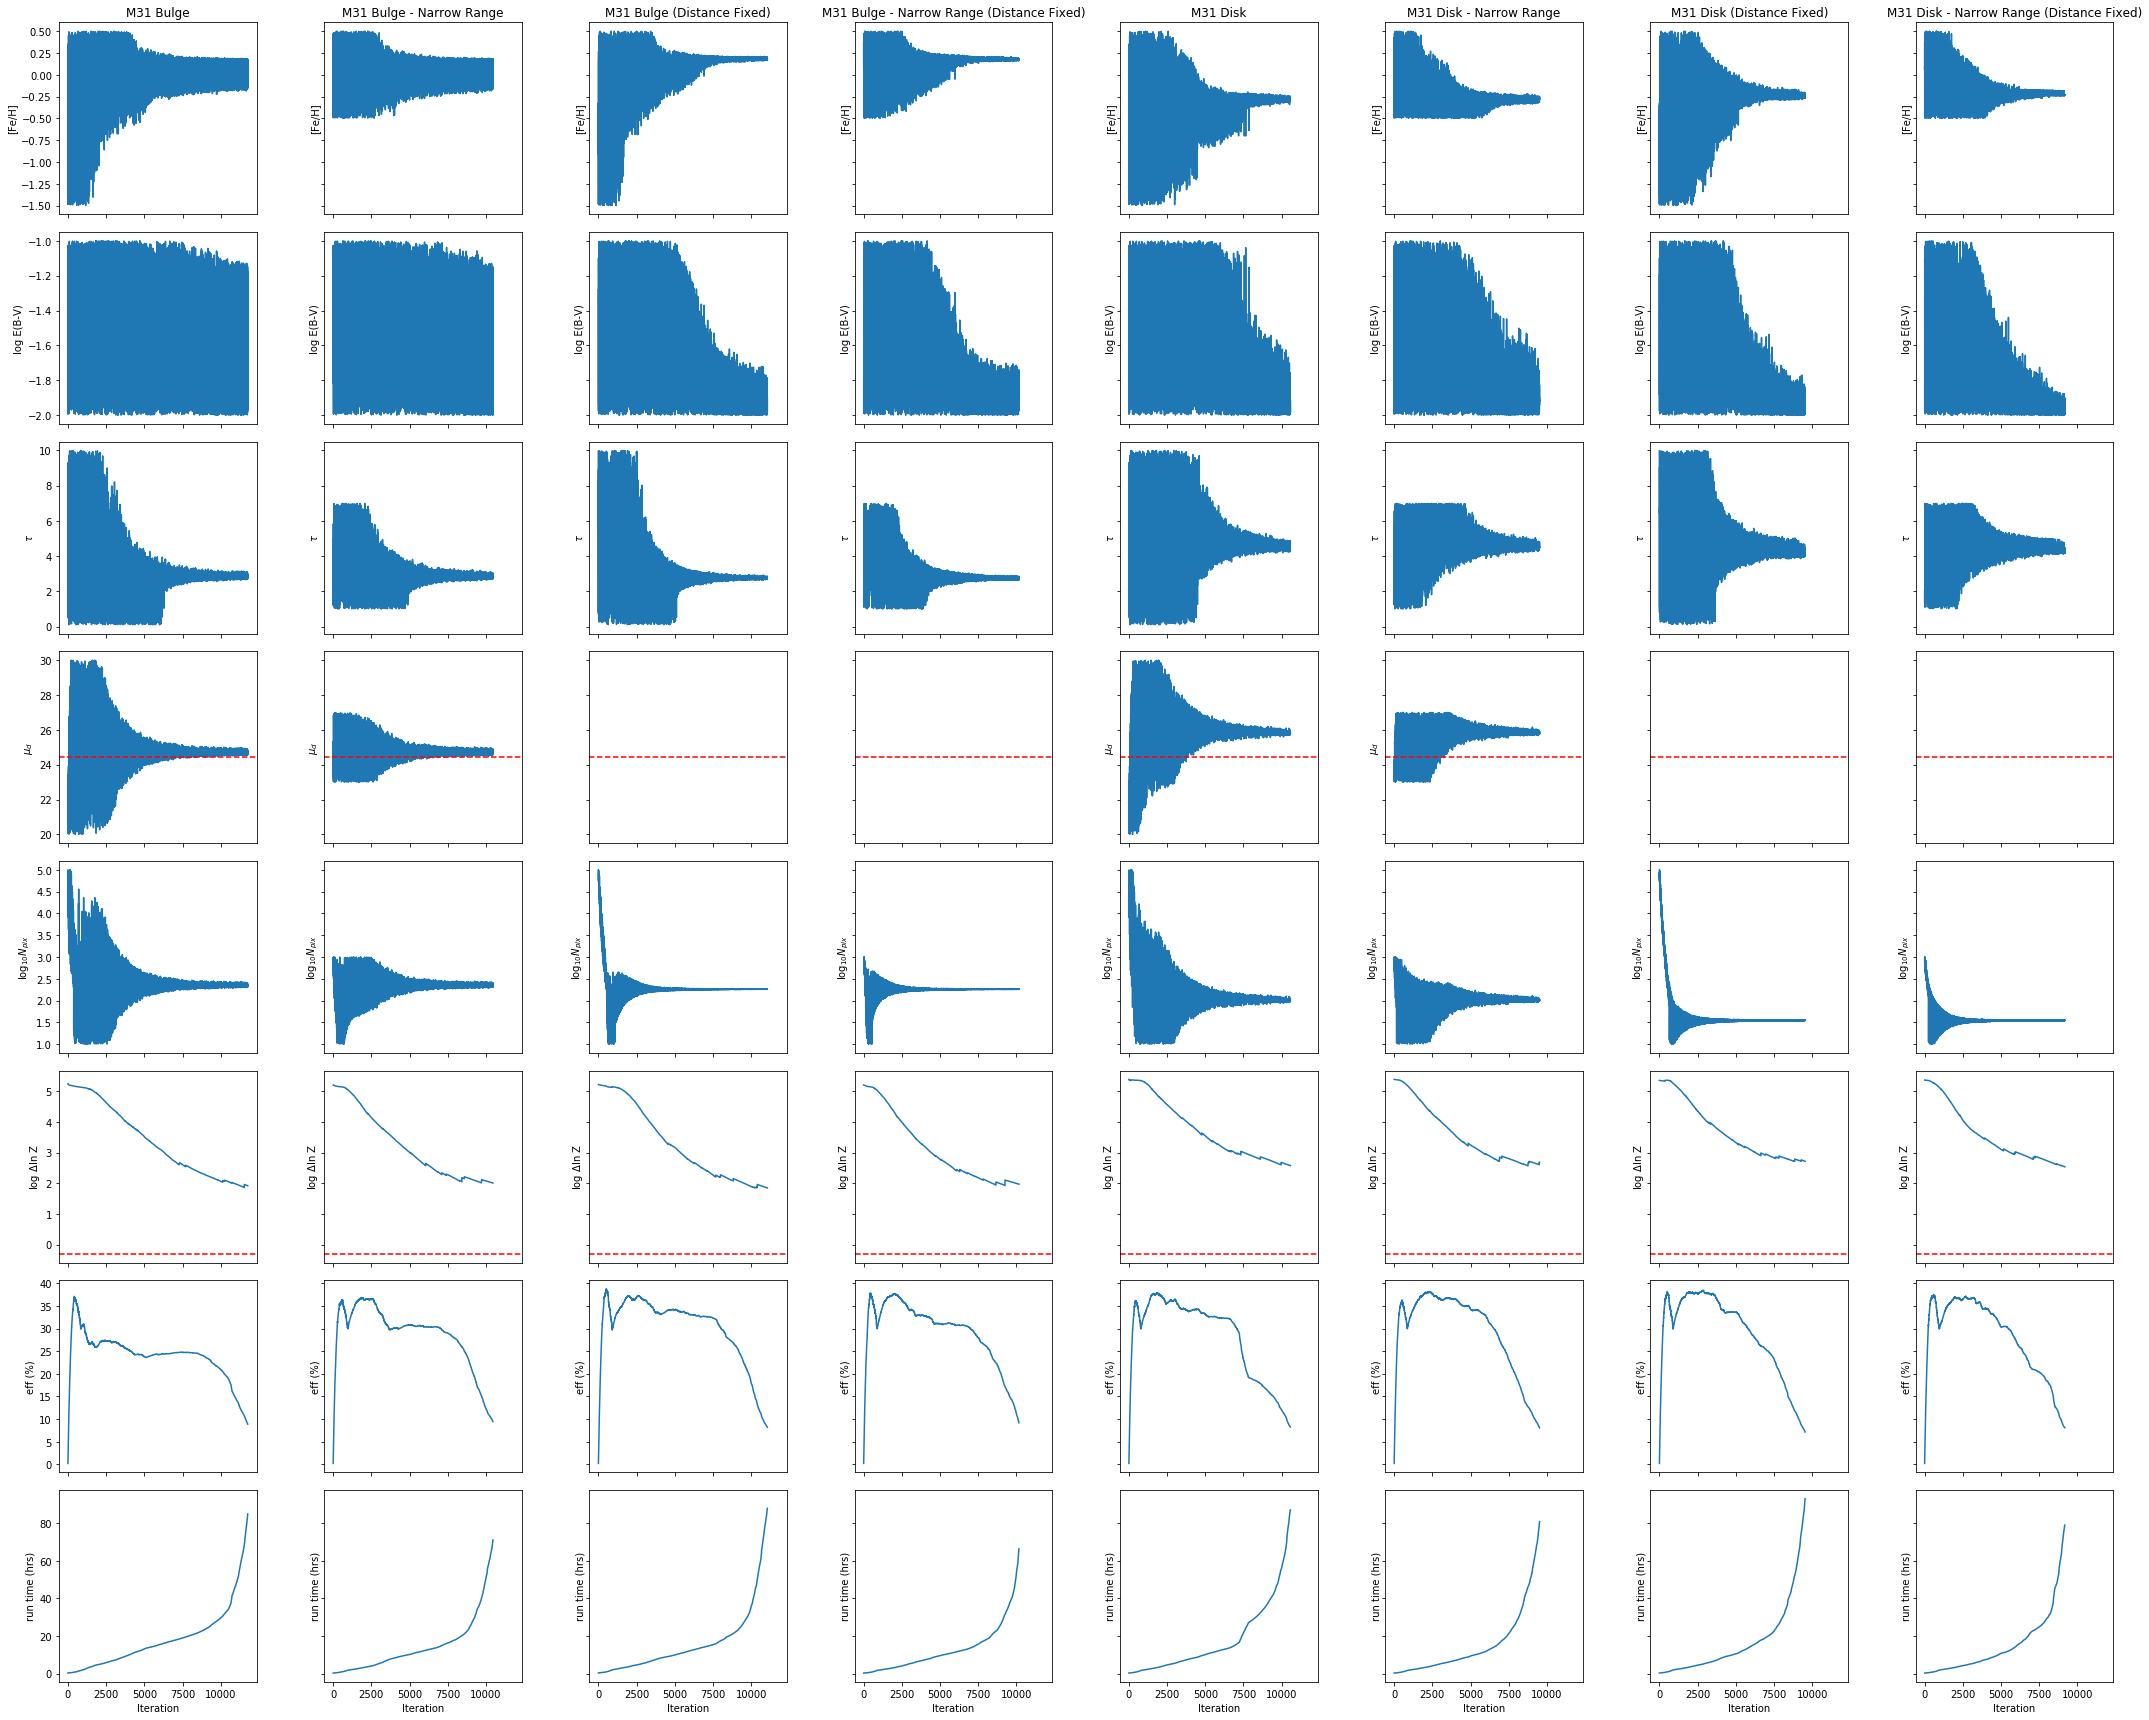

In [91]:
fig, axes = plot_sets(['m{:d}', 'n{:d}', 'm{:d}_nm', 'n{:d}_nm'], chains_only=False)

In [79]:
res['n1_nm'].df.tail(1)[['logfeh_mean', 'logdust', 'logNpix', 'tau']]

logfeh_mean  logdust  logNpix     tau
10168       0.1676  -1.8033    2.258  2.8205

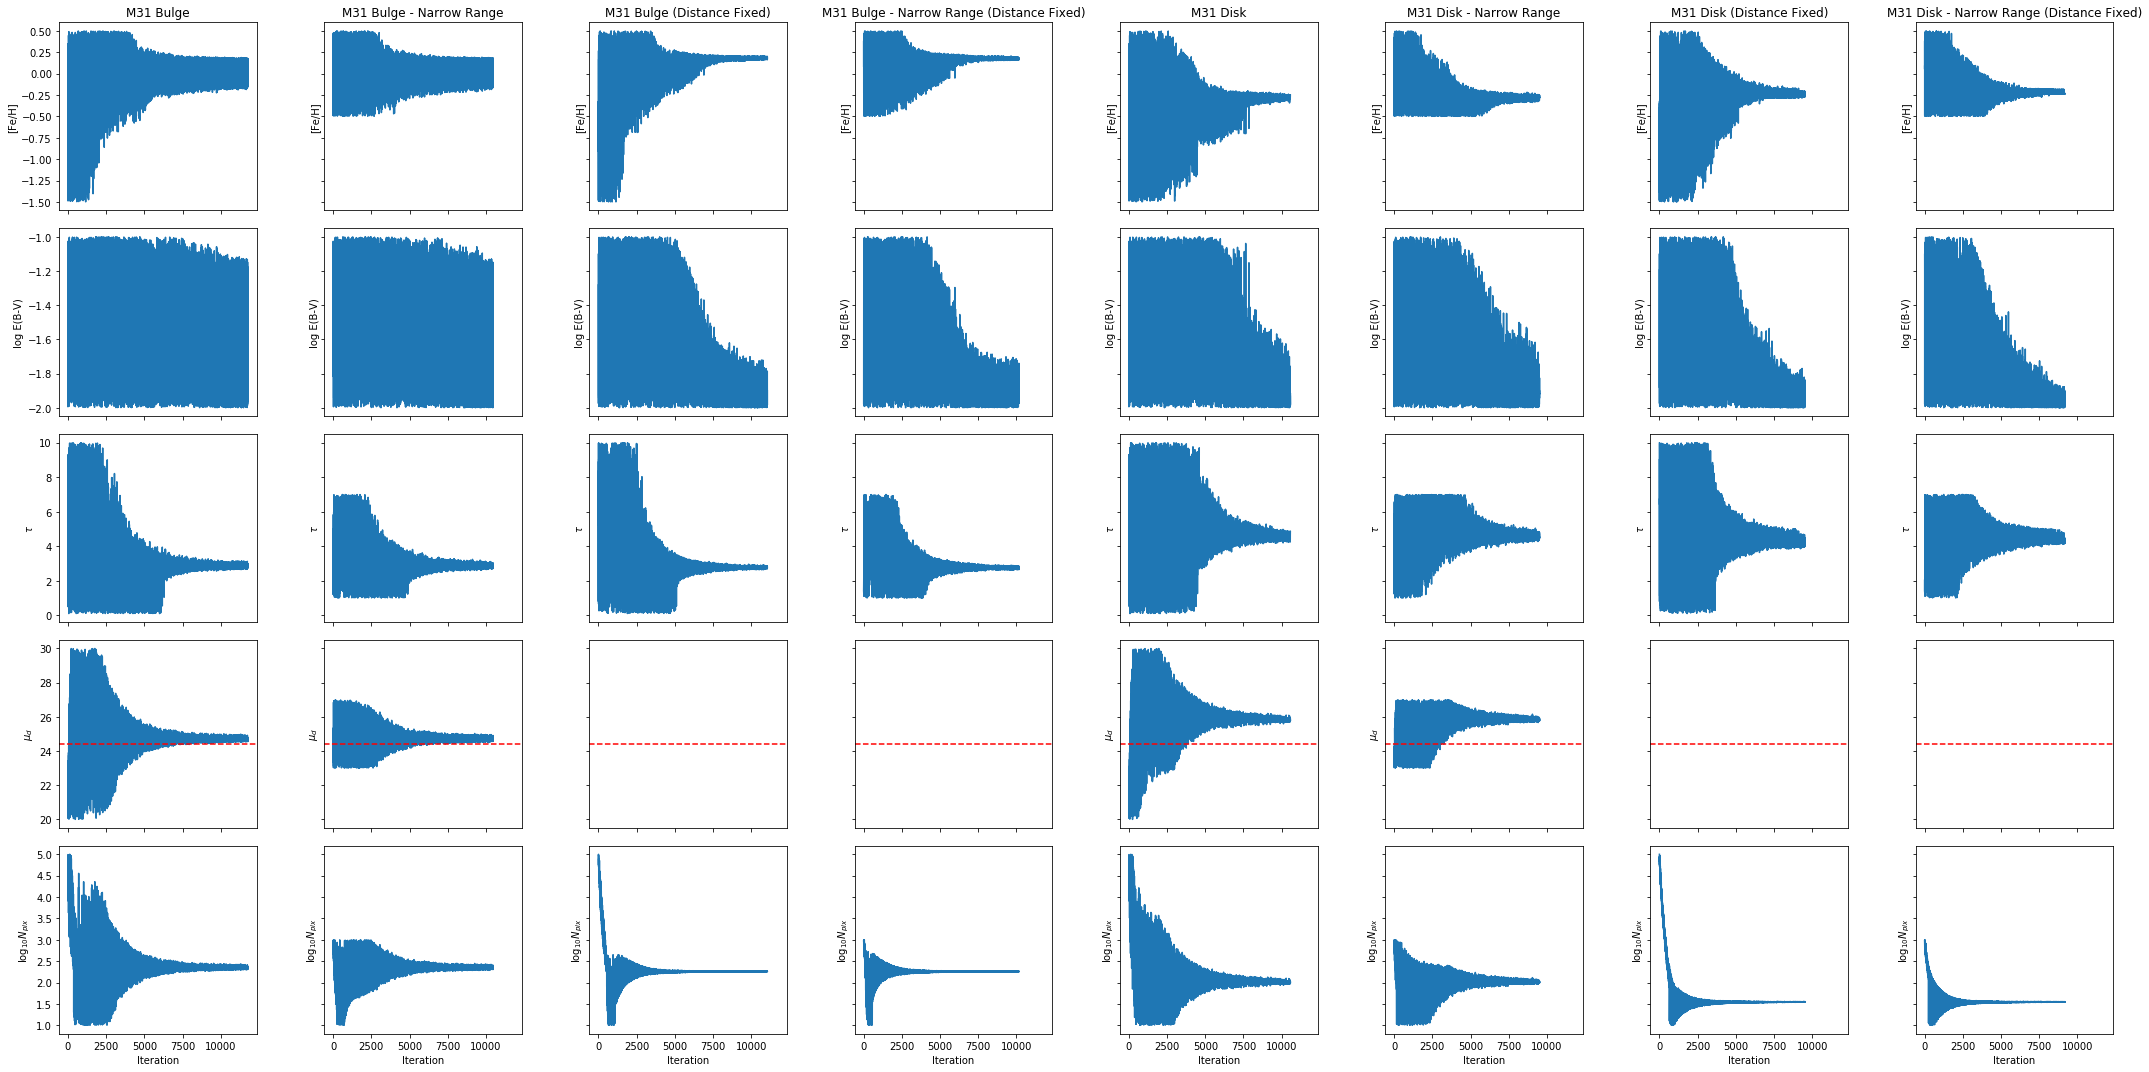

In [49]:
fig, axes = plot_sets(['m{:d}', 'n{:d}', 'm{:d}_nm', 'n{:d}_nm'], chains_only=True)

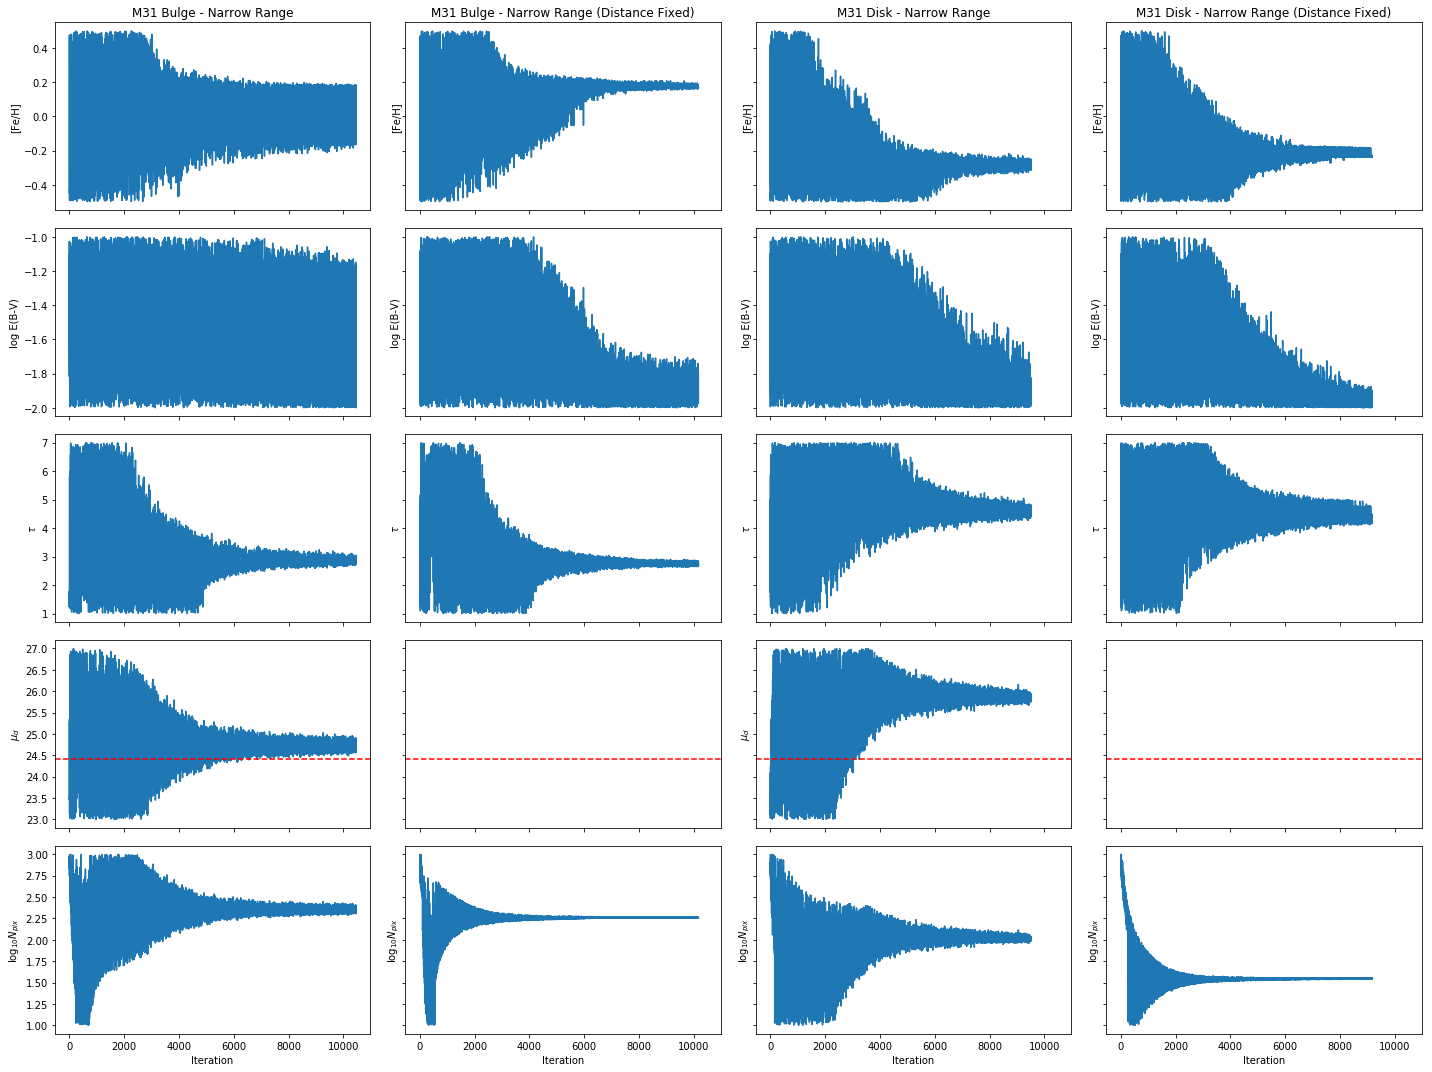

In [50]:
fig, axes = plot_sets(['n{:d}', 'n{:d}_nm'], chains_only=True)

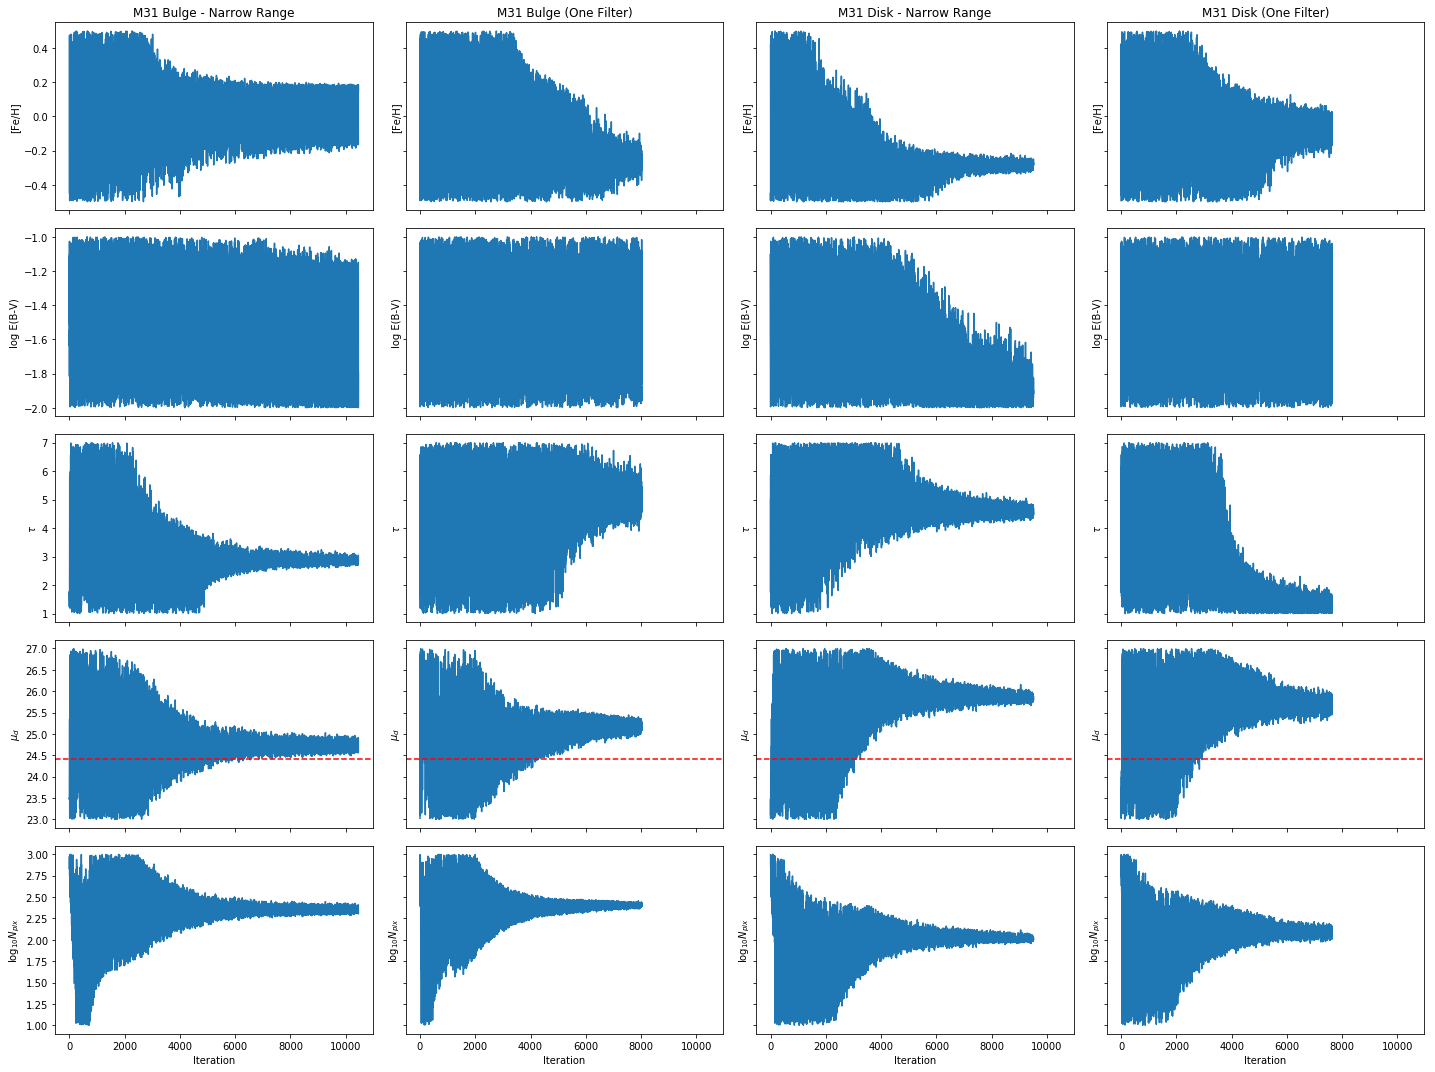

In [13]:
fig, axes = plot_sets(['n{:d}', 'sf_{:d}'], chains_only=True)

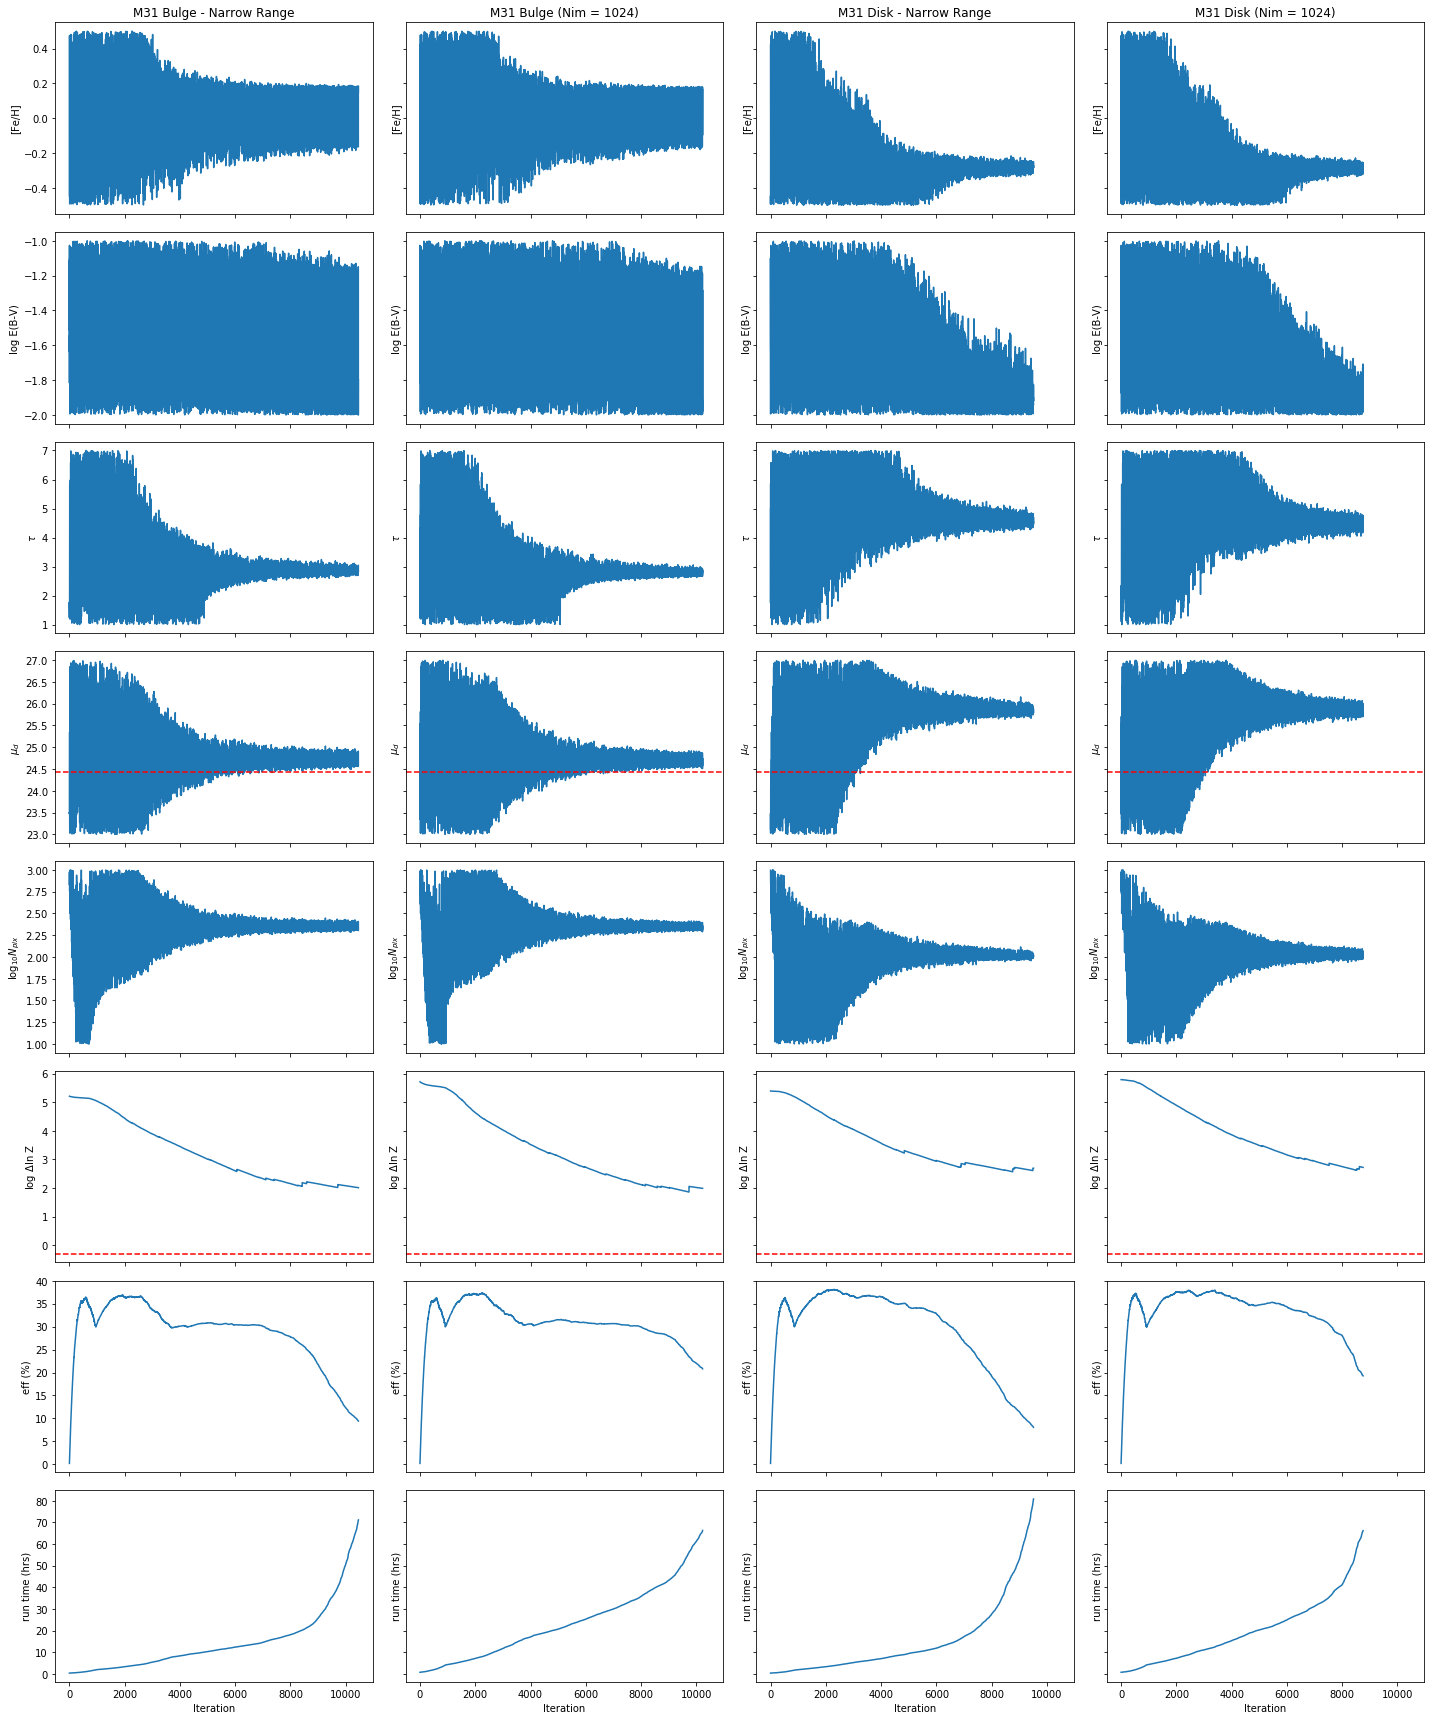

In [52]:
fig, axes = plot_sets(['n{:d}', '1024_{:d}'], chains_only=False)

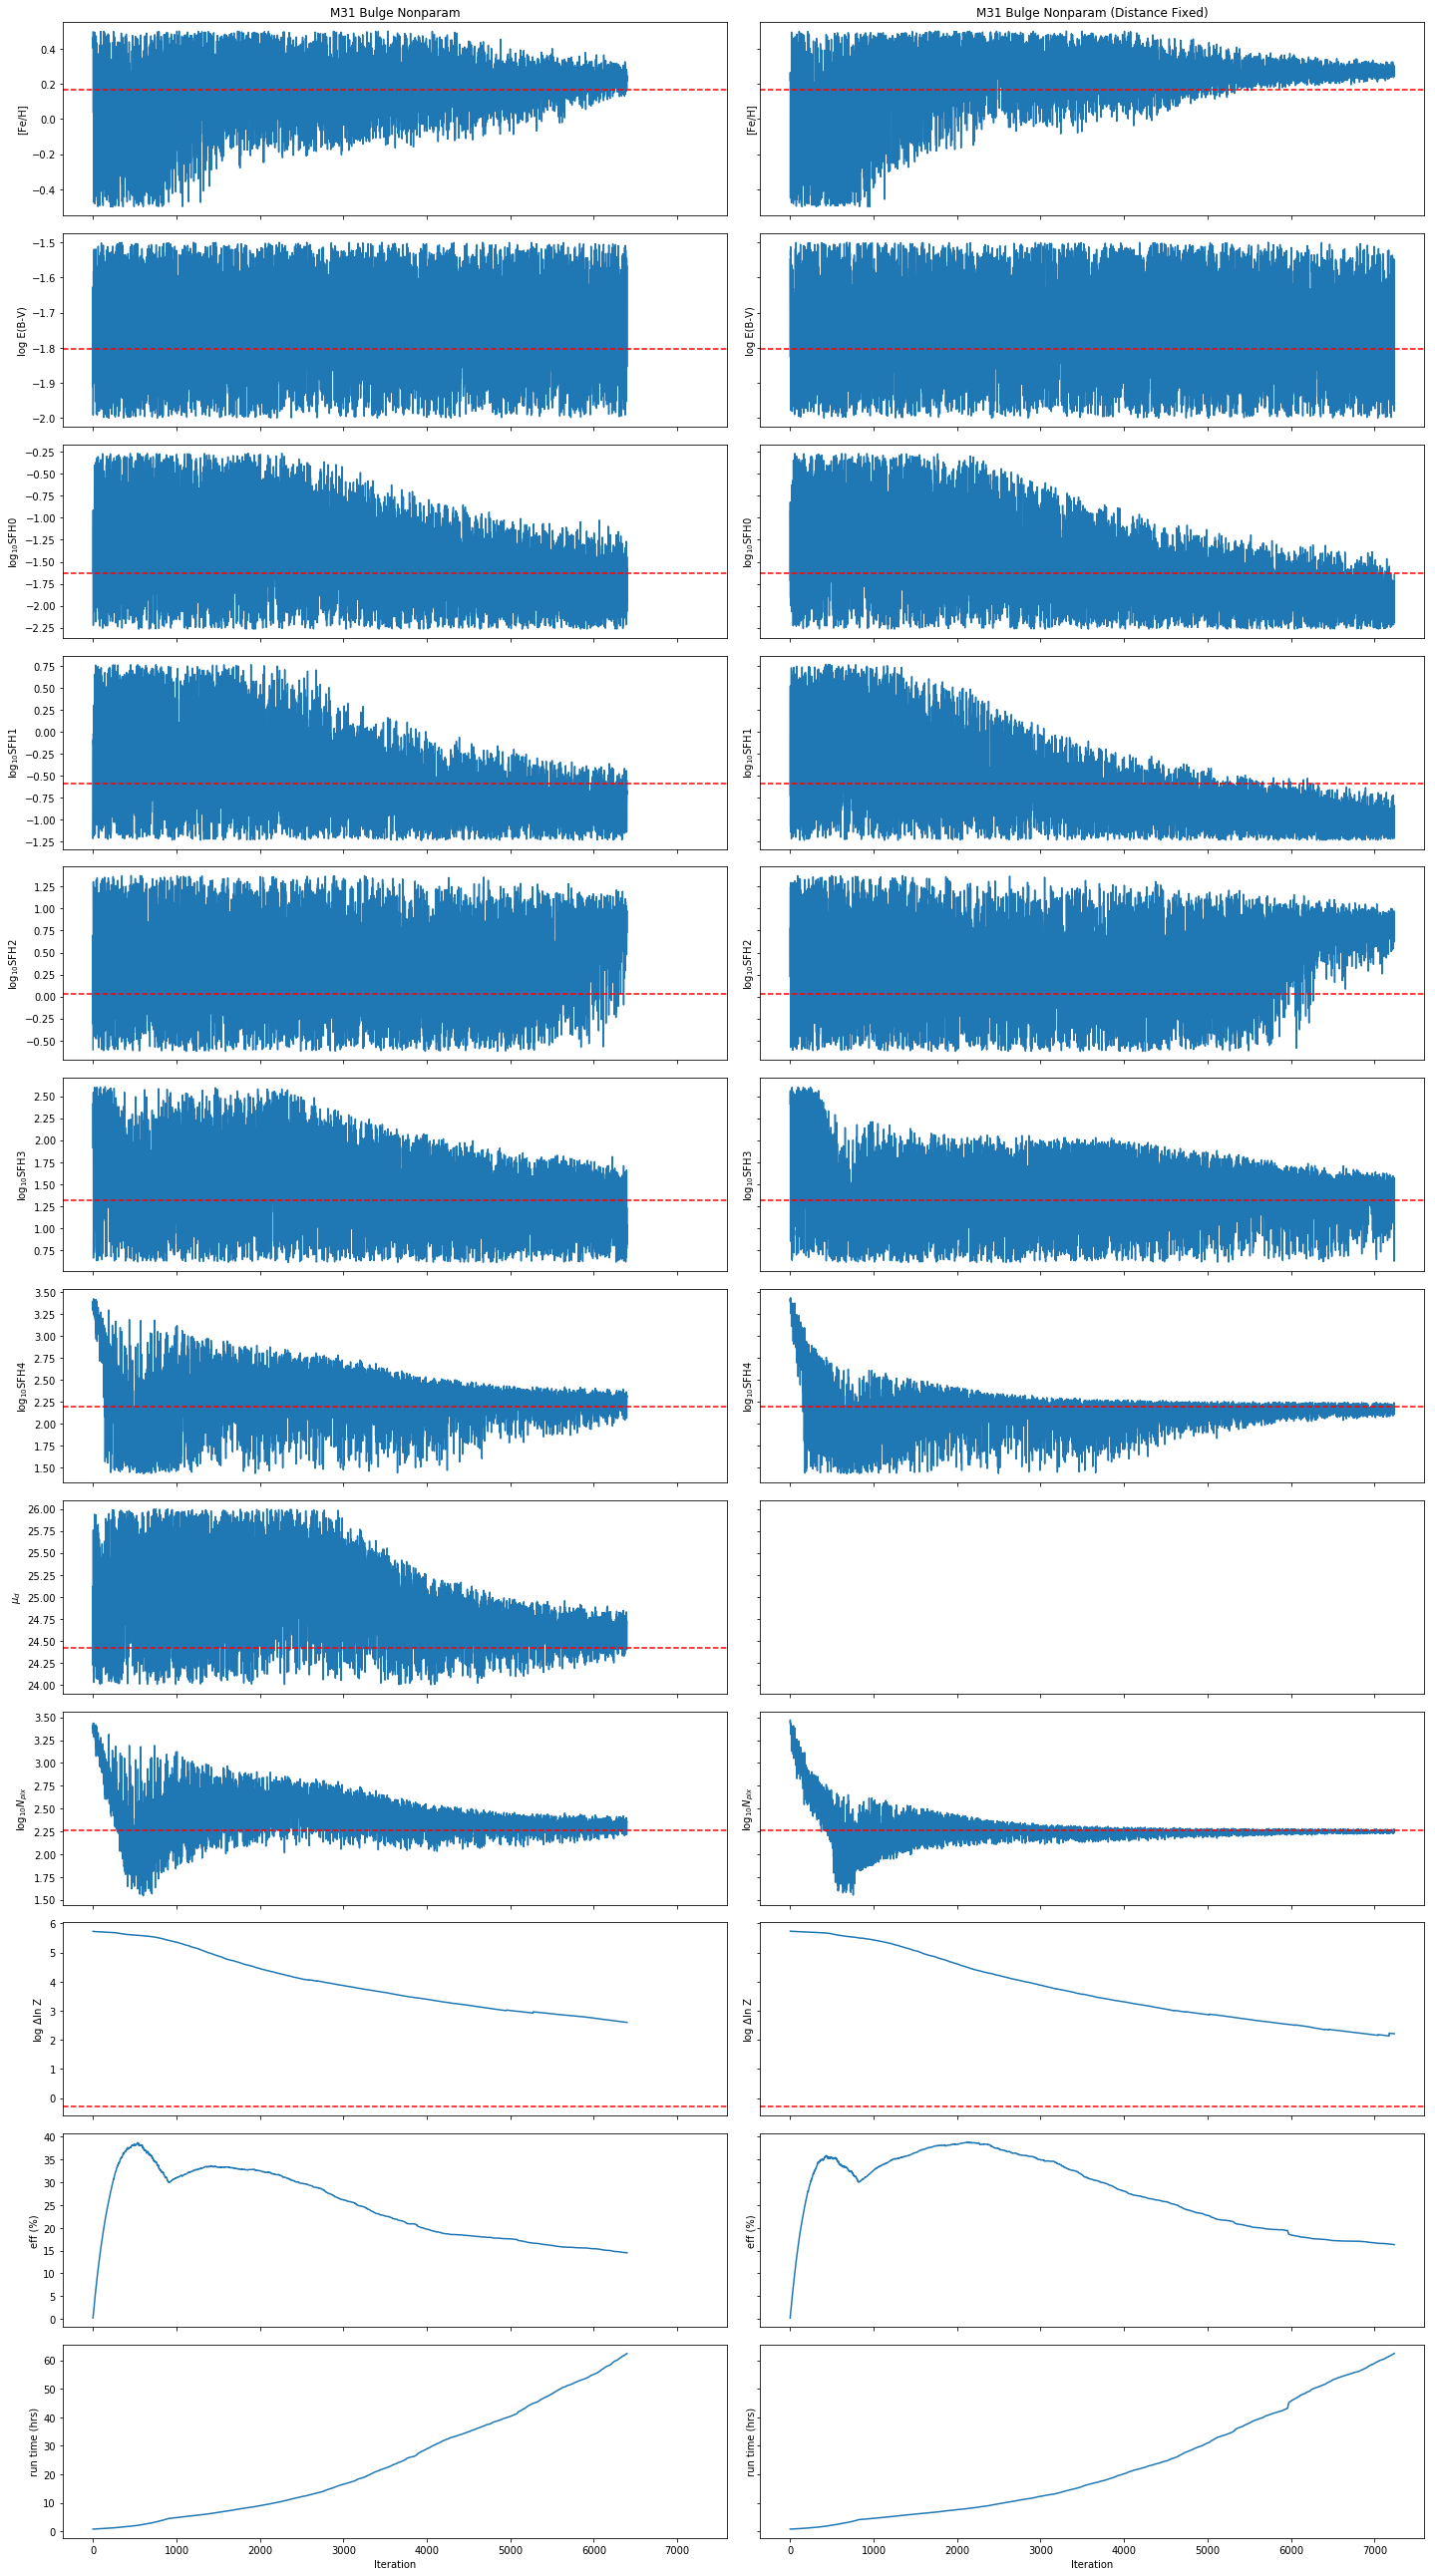

In [94]:
fig, axes = plot_sets(['np{:d}', 'np{:d}_nm'], regions=[1], chains_only=False, nonparam=True)

In [12]:
def plot_dmod(axes, dmod=24.42):
    i_dmod = 3
    for i, ax in enumerate(axes[0]):
        if 'mu' in ax.get_ylim():
            i_dmod = i
    for ax in axes[i_dmod, :i_dmod]:
        ax.axhline(y=24.42, ls='--', color='r')
    for ax in axes[i_dmod:, i_dmod]:
        ax.axvline(x=24.42, ls='--', color='r')

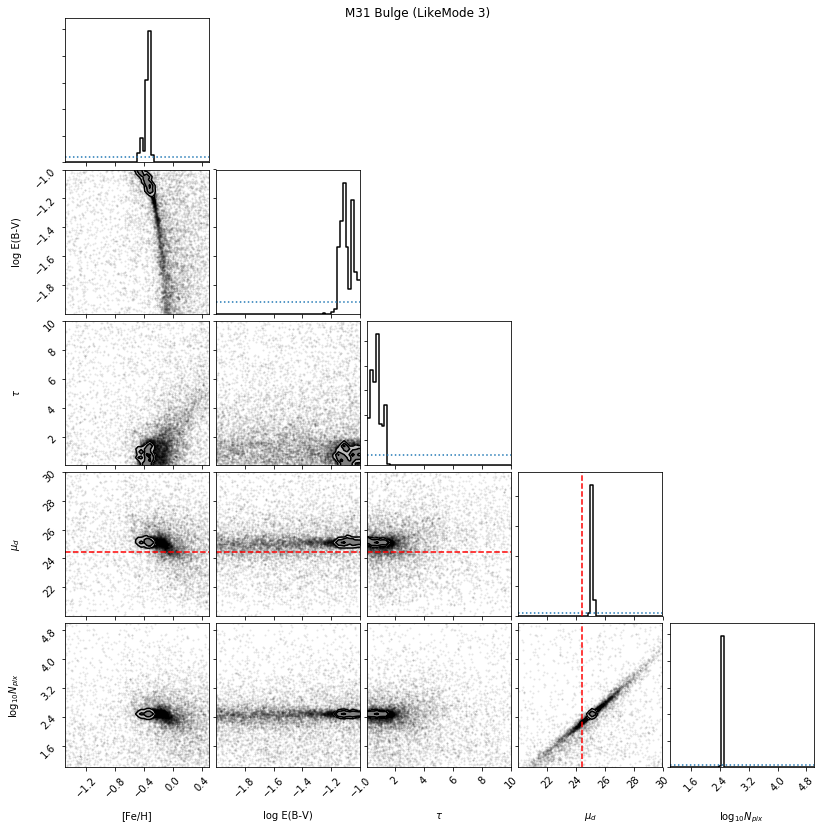

In [13]:
fig, axes = res['lm3_1'].plot_corner(bins=50, weight=True);
plot_dmod(axes)
# plt.savefig('figures/m31_bulge_corner_narrow_weighted.pdf')

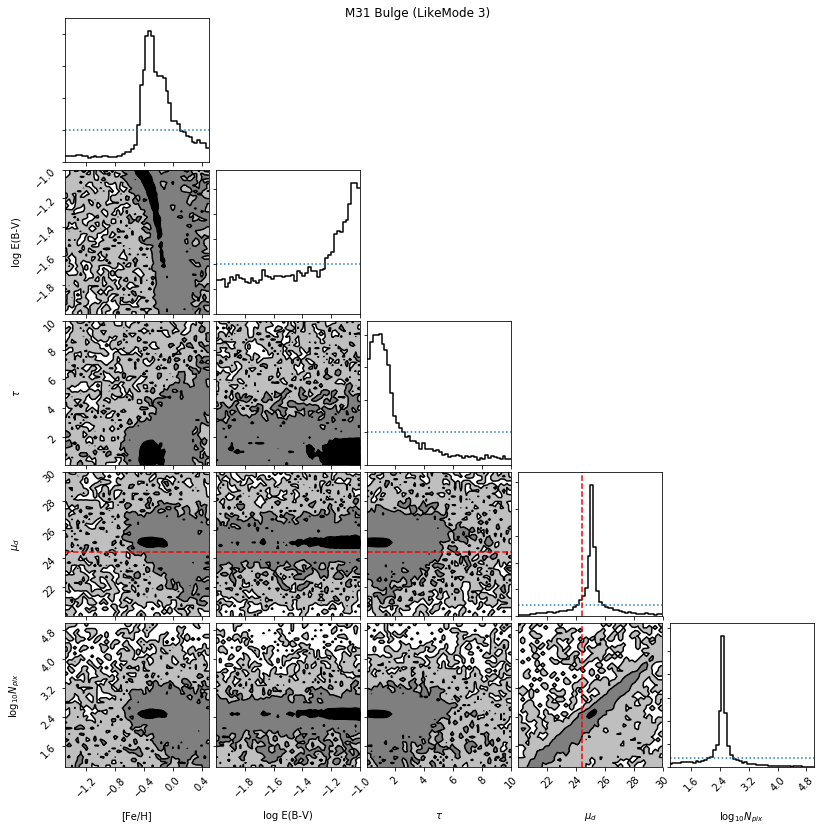

In [14]:
fig, axes = res['lm3_1'].plot_corner(bins=50, weight=False);
plot_dmod(axes)
# plt.savefig('figures/m31_bulge_corner_narrow_weighted.pdf')

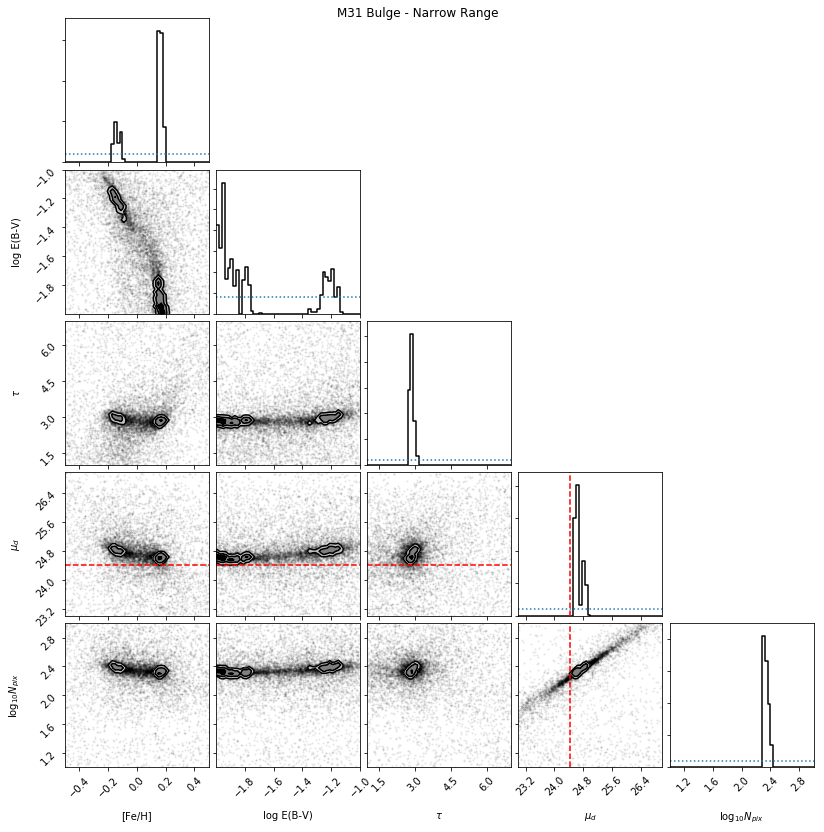

In [123]:
fig, axes = res['n1'].plot_corner(bins=50, weight=True);
plot_dmod(axes)
plt.savefig('figures/m31_bulge_corner_narrow_weighted.pdf')

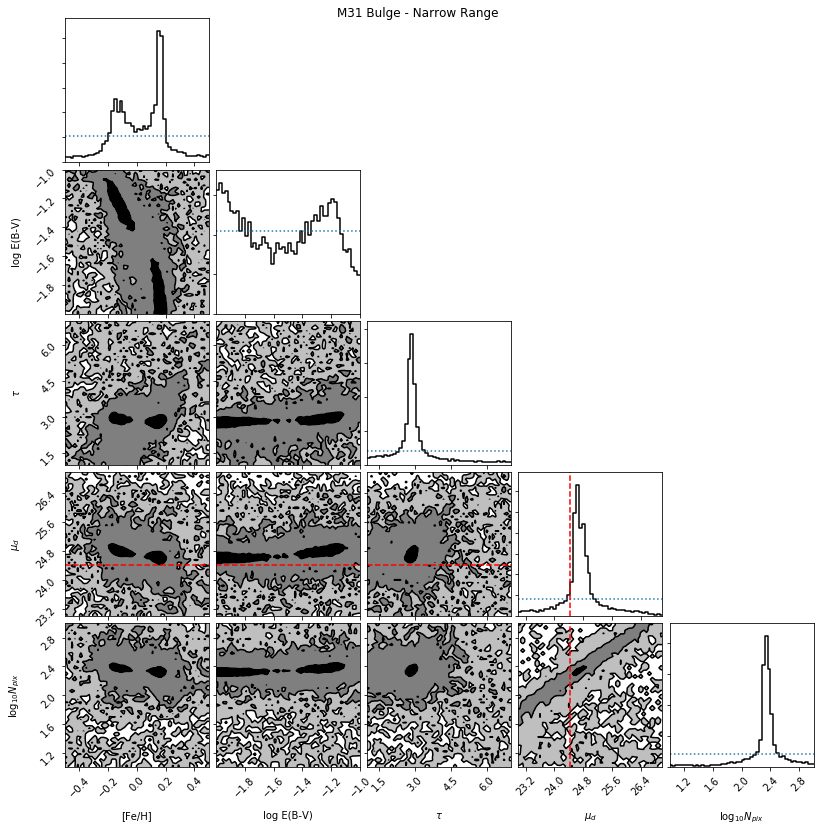

In [124]:
fig, axes = res['n1'].plot_corner(bins=50, weight=False);
plot_dmod(axes)
plt.savefig('figures/m31_bulge_corner_narrow.pdf')

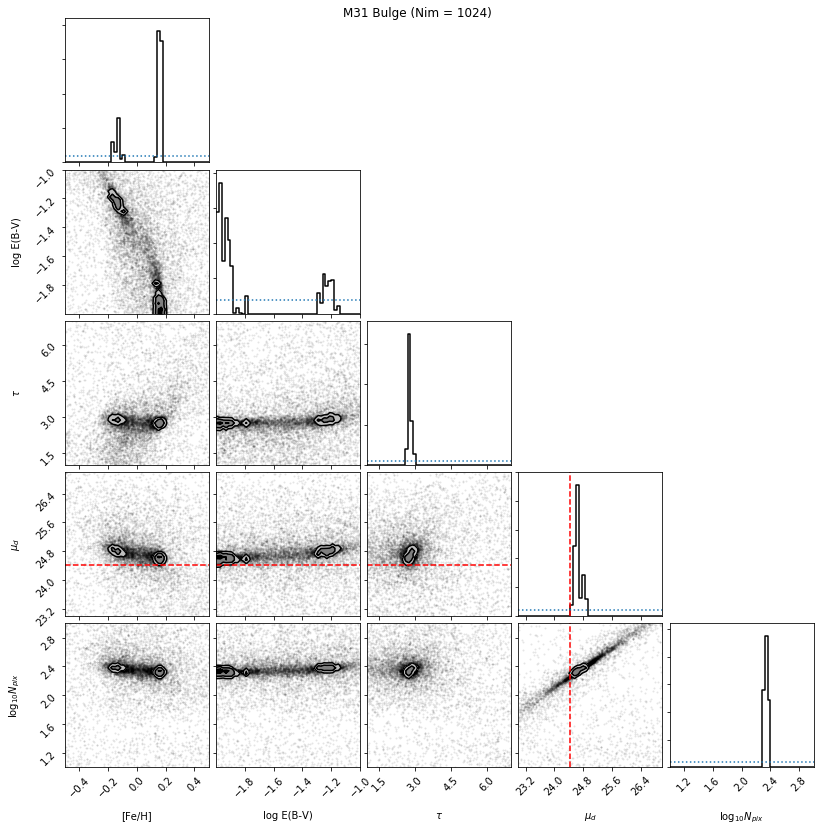

In [125]:
fig, axes = res['1024_1'].plot_corner(bins=50, weight=True);
plot_dmod(axes)
plt.savefig('figures/m31_bulge_corner_1024_weighted.pdf')

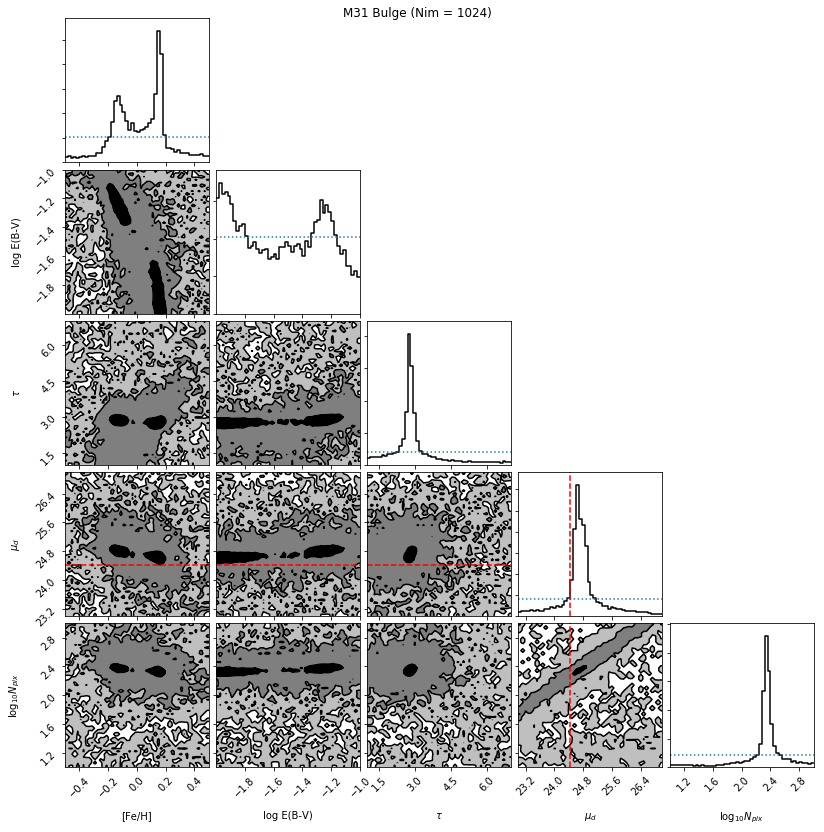

In [126]:
fig, axes = res['1024_1'].plot_corner(bins=50, weight=False);
plot_dmod(axes)
plt.savefig('figures/m31_bulge_corner_1024.pdf')

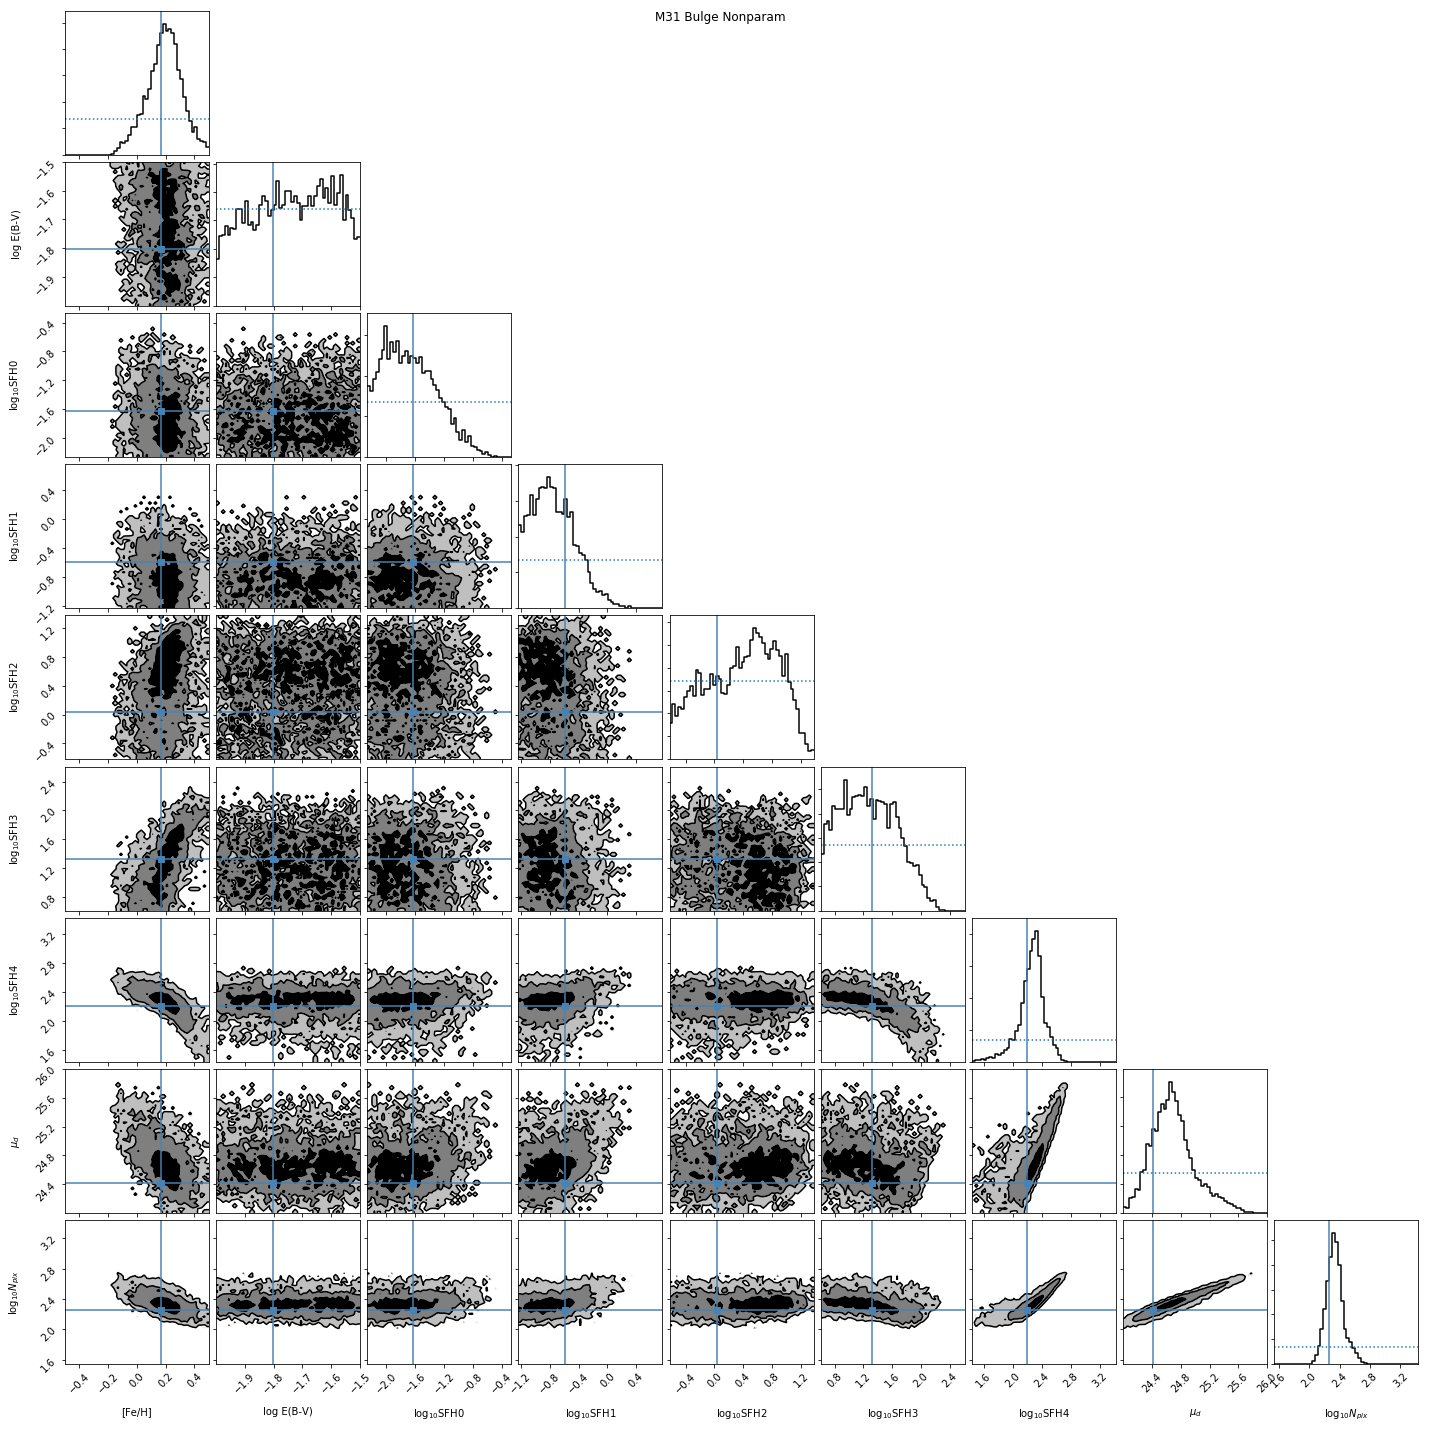

In [127]:
fig, axes = res['np1'].plot_corner(bins=50, weight=False, burn=3000);
plot_dmod(axes)
plt.savefig('figures/m31_bulge_corner_nonparam.pdf')

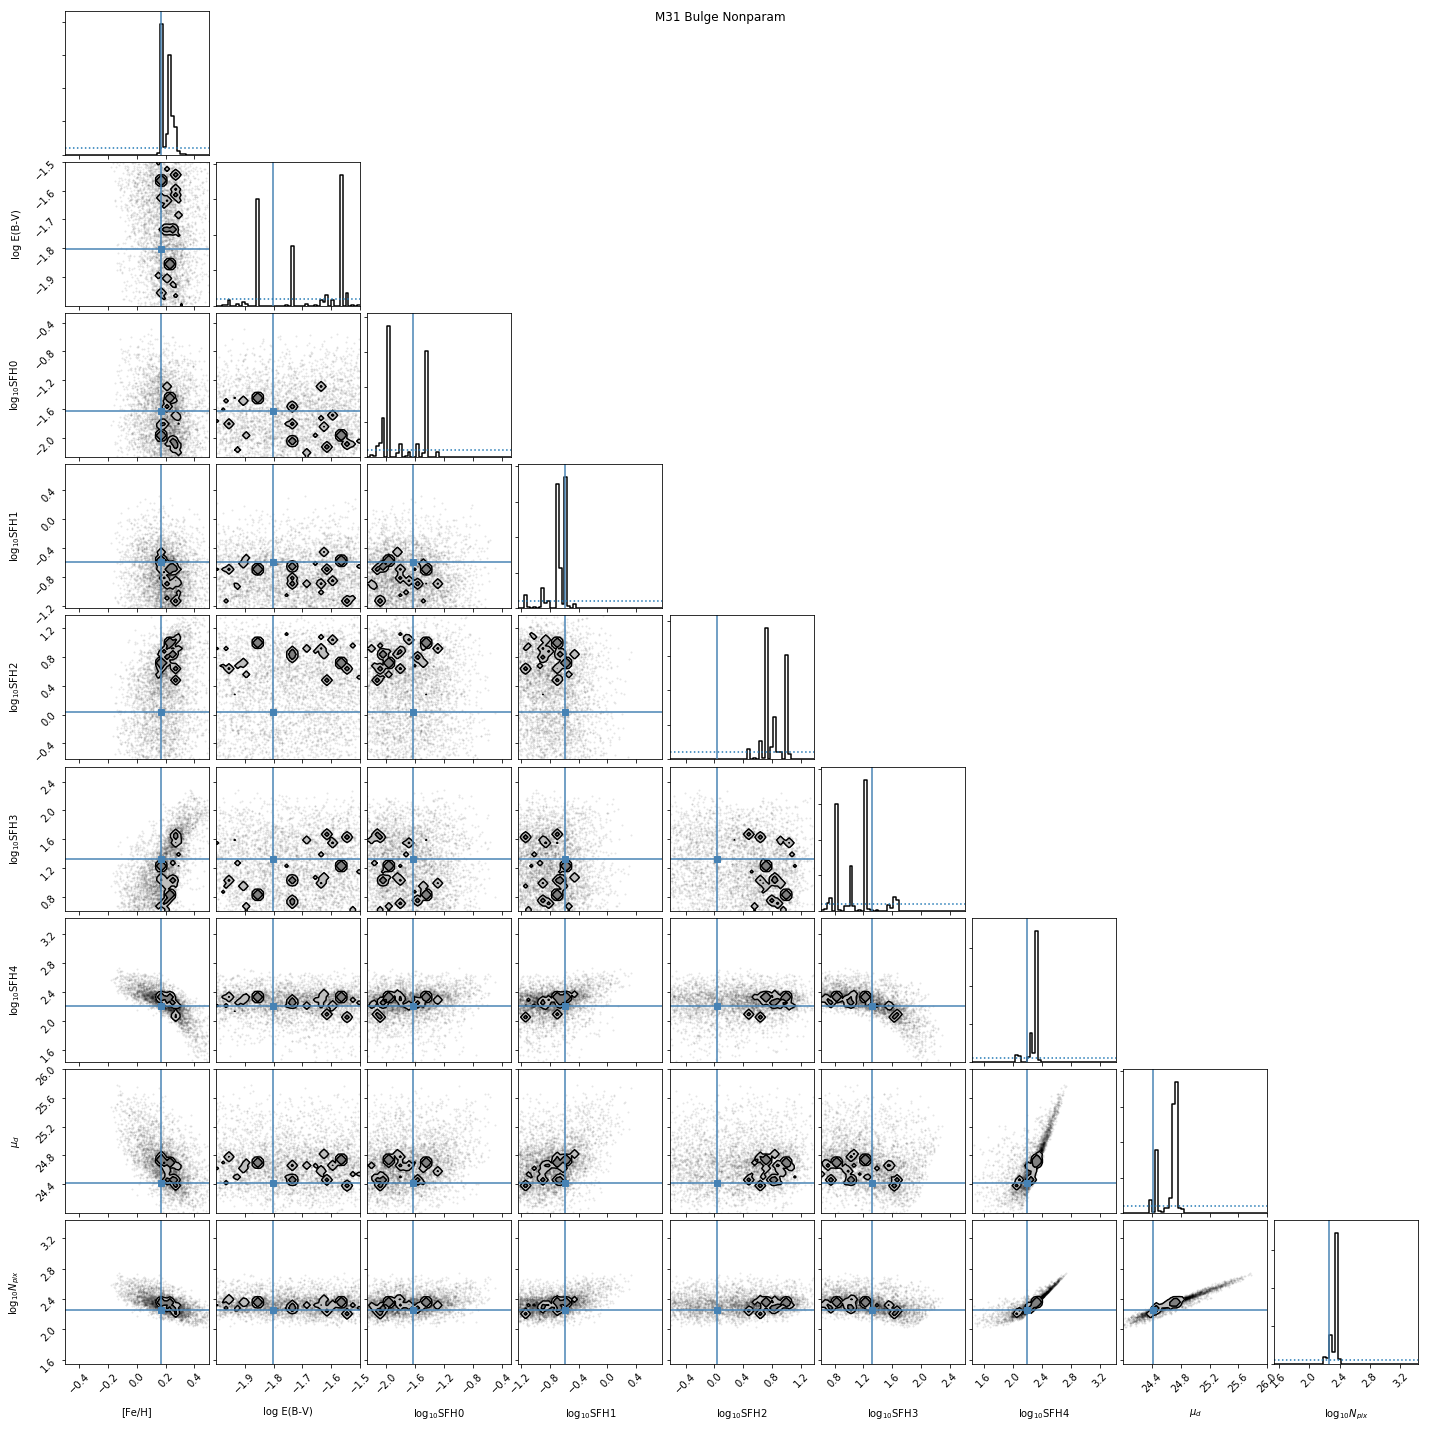

In [131]:
fig, axes = res['np1'].plot_corner(bins=50, weight=True, burn=3000);
plot_dmod(axes)
plt.savefig('figures/m31_bulge_corner_nonparam_weighted.pdf')

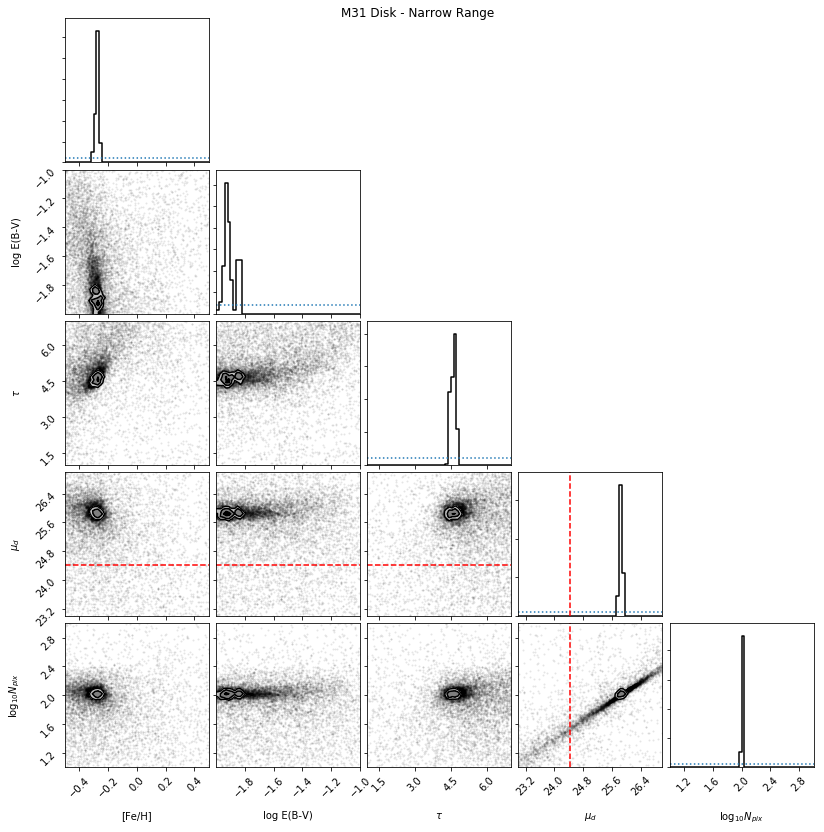

In [129]:
fig, axes = res['n2'].plot_corner(bins=50, weight=True);
plot_dmod(axes)
plt.savefig('figures/m31_disk_corner_narrow_weighted.pdf')

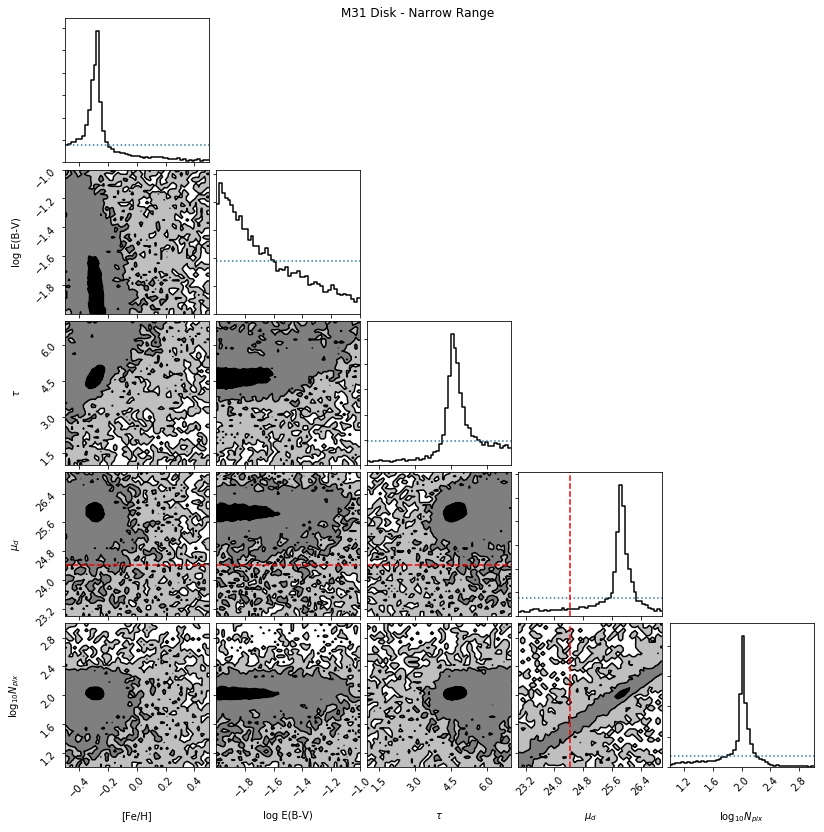

In [130]:
fig, axes = res['n2'].plot_corner(bins=50, weight=False);
plot_dmod(axes)
plt.savefig('figures/m31_disk_corner_narrow_weighted.pdf')

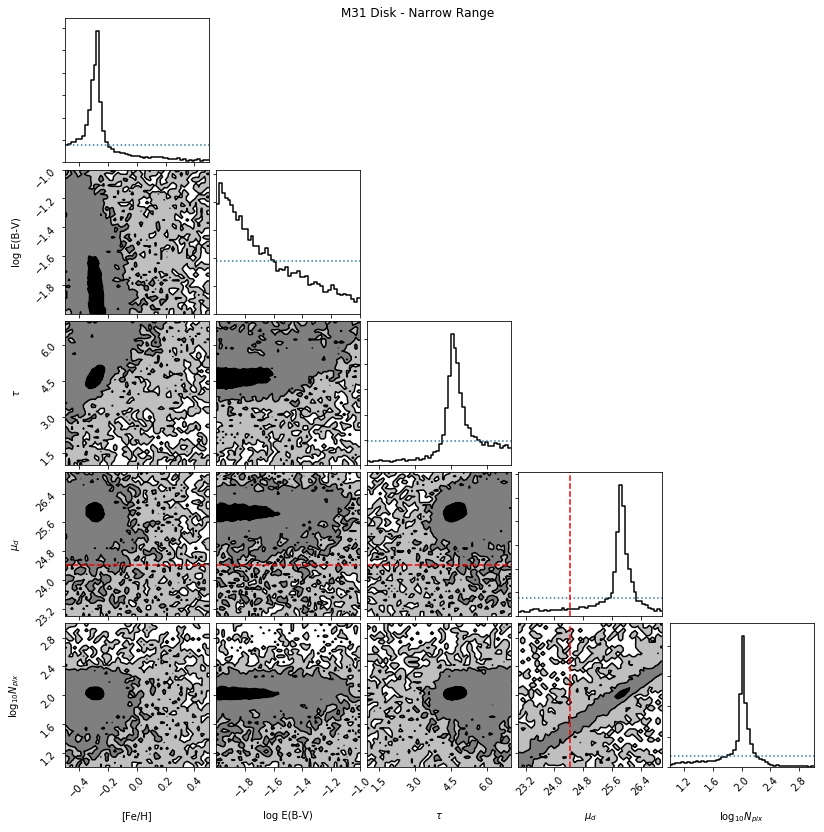

In [130]:
fig, axes = res['n2'].plot_corner(bins=50, weight=False);
plot_dmod(axes)
plt.savefig('figures/m31_disk_corner_narrow_weighted.pdf')

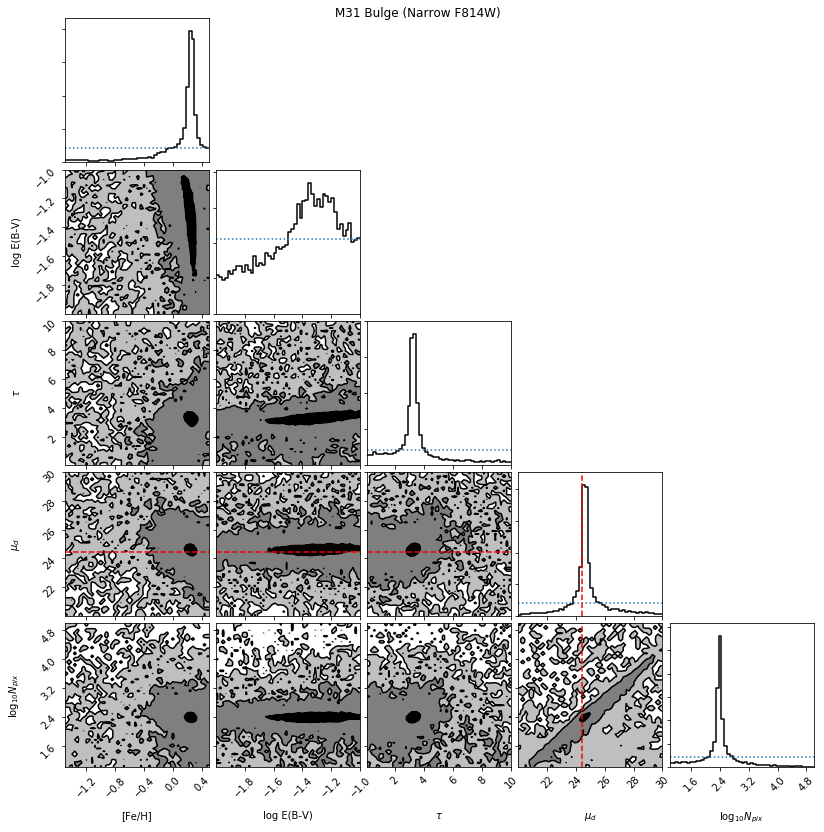

In [17]:
fig, axes = res['psf_1'].plot_corner(bins=50, weight=False);
plot_dmod(axes)
plt.savefig('figures/m31_bulge_narrowF814W.pdf')

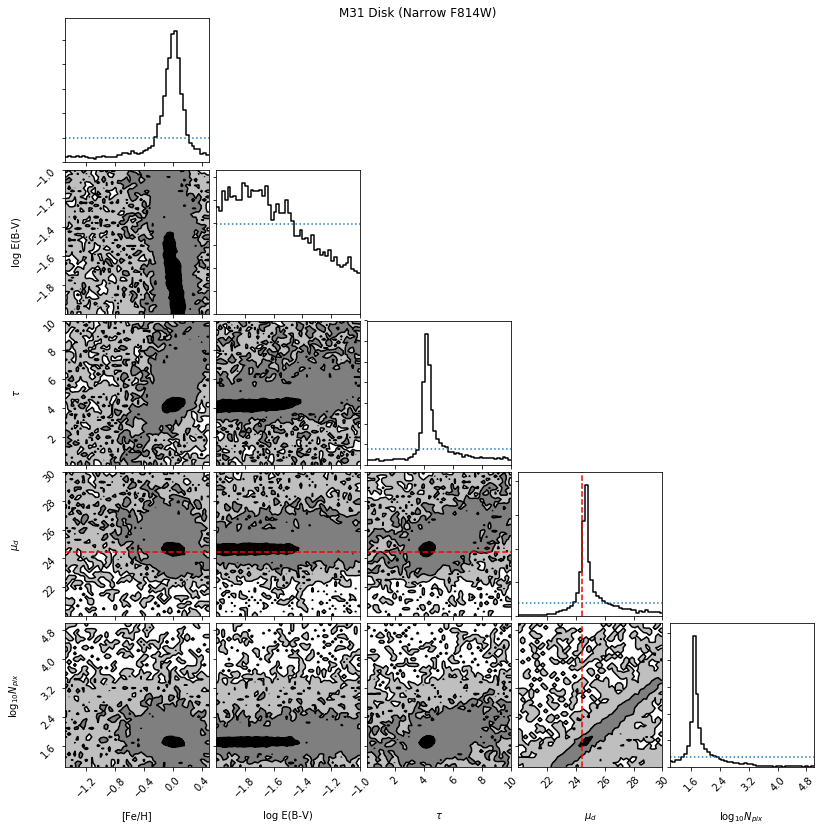

In [18]:
fig, axes = res['psf_2'].plot_corner(bins=50, weight=False);
plot_dmod(axes)
plt.savefig('figures/m31_disk_narrowF814W.pdf')

In [18]:
np.sqrt(np.pi * (6250**2 - 6200**2) * (30 / 360.))

403.69557701933087

In [14]:
28845./3235

8.916537867078825

In [15]:
32400./3620

8.950276243093922

In [16]:
from astropy.io import fits